In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
csv_path = '/Users/mpillodi/documents/GitHub/wind-data-analysis/csvfolder/2013_03_13_0000.csv'

In [3]:
df = pd.read_csv(csv_path)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 44 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    144 non-null    object 
 1   time    144 non-null    object 
 2   period  144 non-null    int64  
 3   s1a     144 non-null    float64
 4   s1x     144 non-null    float64
 5   s1i     144 non-null    float64
 6   s1s     144 non-null    float64
 7   s2a     144 non-null    float64
 8   s2x     144 non-null    float64
 9   s2i     144 non-null    float64
 10  s2s     144 non-null    float64
 11  s3a     144 non-null    float64
 12  s3x     144 non-null    float64
 13  s3i     144 non-null    float64
 14  s3s     144 non-null    float64
 15  d1a     144 non-null    int64  
 16  d1s     144 non-null    int64  
 17  d2a     144 non-null    int64  
 18  d2s     144 non-null    int64  
 19  h1a     144 non-null    int64  
 20  h1x     144 non-null    int64  
 21  h1i     144 non-null    int64  
 22  t1

In [4]:
# Convert 'date' and 'time' columns to datetime format and set as index
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df.set_index('datetime', inplace=True)
df.sort_index(inplace=True)
df.head()

date      time  period      s1a     s1x     s1i  \
datetime                                                                     
2013-03-13 00:10:00  2013-03-13  00:10:00     600  5.49950  6.2339  4.3520   
2013-03-13 00:20:00  2013-03-13  00:20:00     600  5.08181  5.4995  4.5356   
2013-03-13 00:30:00  2013-03-13  00:30:00     600  5.44442  6.1421  4.4438   
2013-03-13 00:40:00  2013-03-13  00:40:00     600  5.71523  6.2339  5.2241   
2013-03-13 00:50:00  2013-03-13  00:50:00     600  5.38934  6.3716  3.3881   

                         s1s      s2a     s2x     s2i  ...  tii  vxa  vxx  \
datetime                                               ...                  
2013-03-13 00:10:00  0.43146  5.48473  6.3706  4.4428  ...   42  125  125   
2013-03-13 00:20:00  0.17901  5.08081  5.4985  4.5805  ...   42  125  125   
2013-03-13 00:30:00  0.30753  5.45719  6.1870  4.5346  ...   42  125  125   
2013-03-13 00:40:00  0.16524  5.71423  6.1411  5.1313  ...   42  125  125   
2013-03-13 00:50:00  0.50949  5.37916  6.3247  2.6068  ...   42  125  125   

                     vxi  bla  blx  bli  bra  brx  bri  
datetime                                                
2013-03-13 00:10:00  124   83   83   83   83   83   83  
2013-03-13 00:20:00  125   83   83   83   83   83   83  
2013-03-13 00:30:00  125   83   83   83   83   83   83  
2013-03-13 00:40:00  125   83   83   83   83   83   83  
2013-03-13 00:50:00  125   83   83   83   83   83   83  

[5 rows x 44 columns]


Analysis for column: s1a
Descriptive Statistics:
count    144.000000
mean       2.854194
std        1.519869
min        0.422960
25%        1.466038
50%        2.655995
75%        4.275118
max        5.715230
Name: s1a, dtype: float64


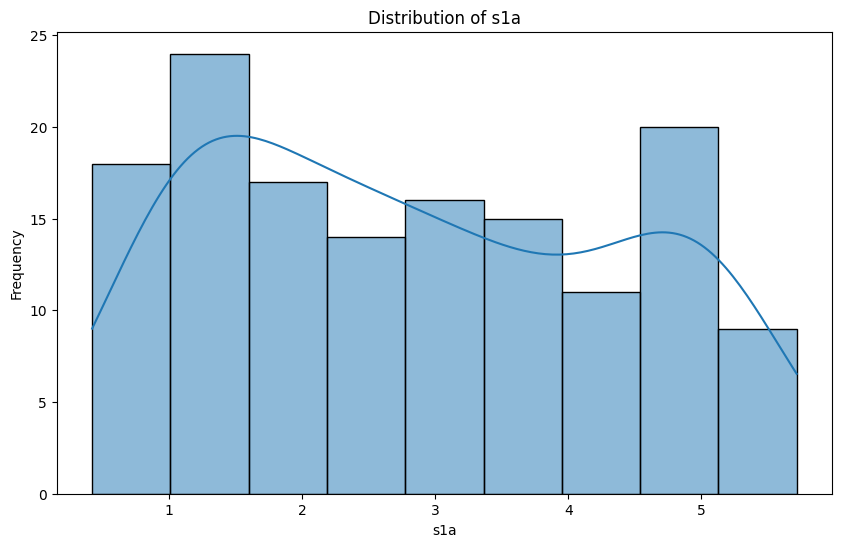


Analysis for column: s1x
Descriptive Statistics:
count    144.000000
mean       3.570106
std        1.556274
min        1.001300
25%        2.229125
50%        3.342200
75%        4.994600
max        6.371600
Name: s1x, dtype: float64


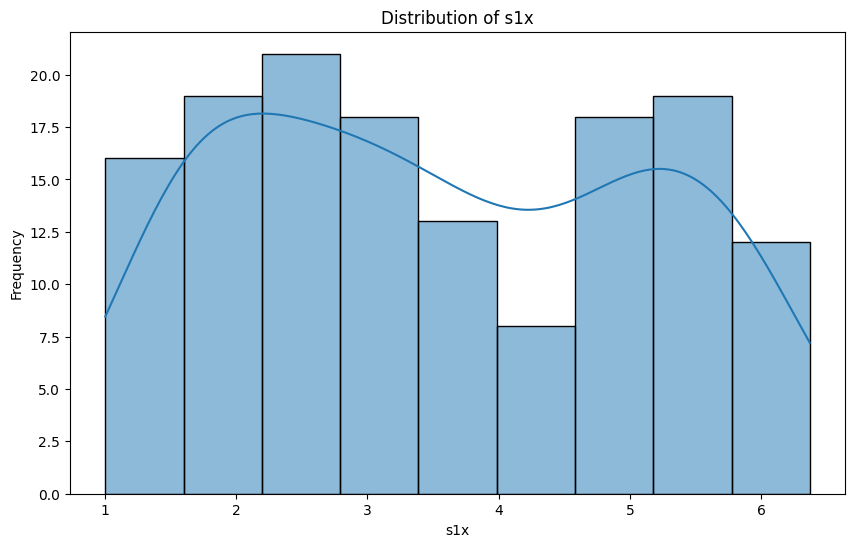


Analysis for column: s1i
Descriptive Statistics:
count    144.000000
mean       2.126806
std        1.425088
min        0.221000
25%        0.863600
50%        2.079950
75%        3.296300
max        5.224100
Name: s1i, dtype: float64


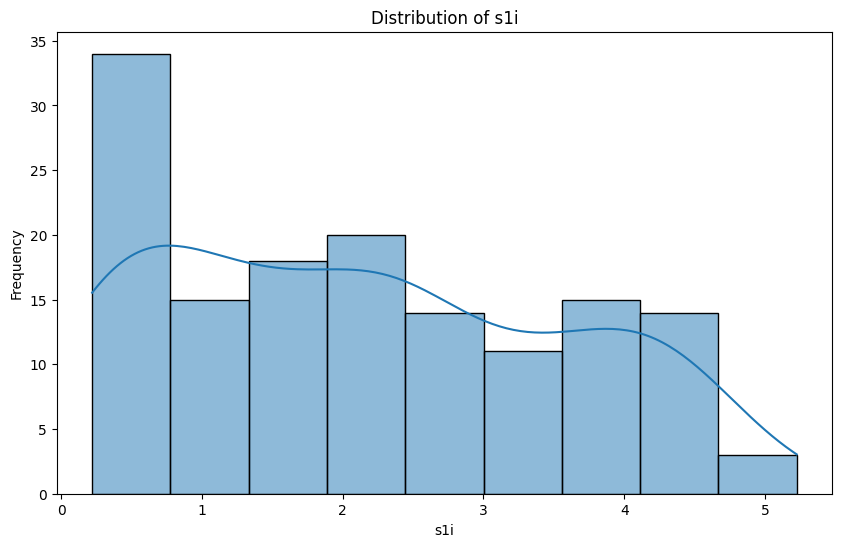


Analysis for column: s1s
Descriptive Statistics:
count    144.000000
mean       0.297171
std        0.120823
min        0.064260
25%        0.218025
50%        0.284580
75%        0.340808
max        0.940950
Name: s1s, dtype: float64


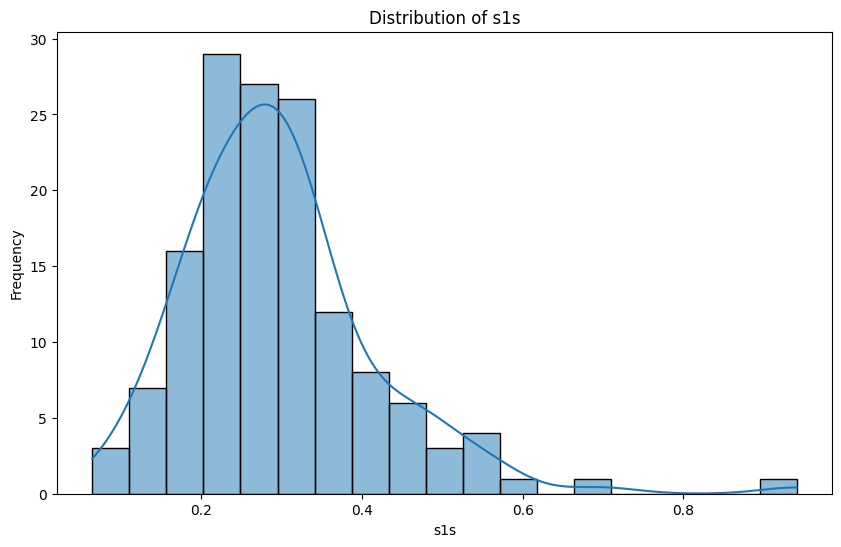


Analysis for column: s2a
Descriptive Statistics:
count    144.000000
mean       2.805828
std        1.508250
min        0.371470
25%        1.452415
50%        2.595325
75%        4.232807
max        5.728000
Name: s2a, dtype: float64


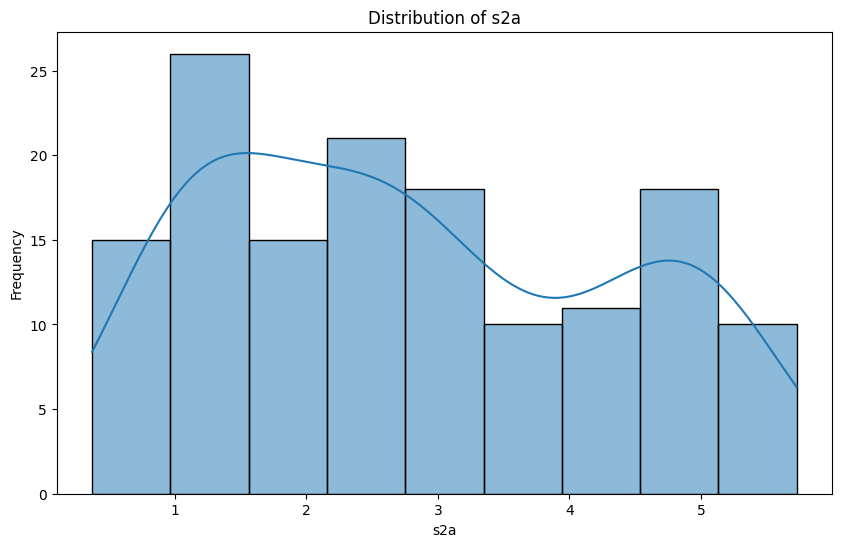


Analysis for column: s2x
Descriptive Statistics:
count    144.000000
mean       3.548388
std        1.536702
min        0.908500
25%        2.228125
50%        3.364150
75%        4.878850
max        6.370600
Name: s2x, dtype: float64


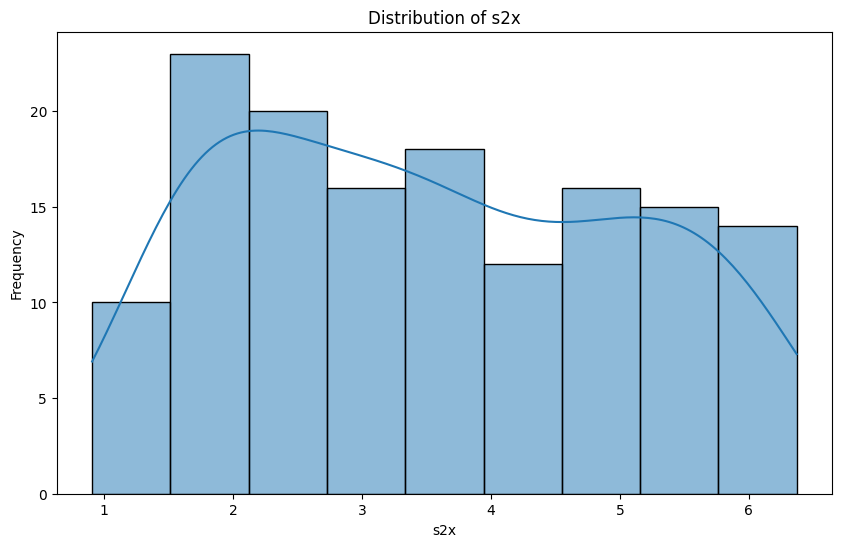


Analysis for column: s2i
Descriptive Statistics:
count    144.000000
mean       2.008188
std        1.399561
min        0.220000
25%        0.897025
50%        1.780600
75%        3.180550
max        5.131300
Name: s2i, dtype: float64


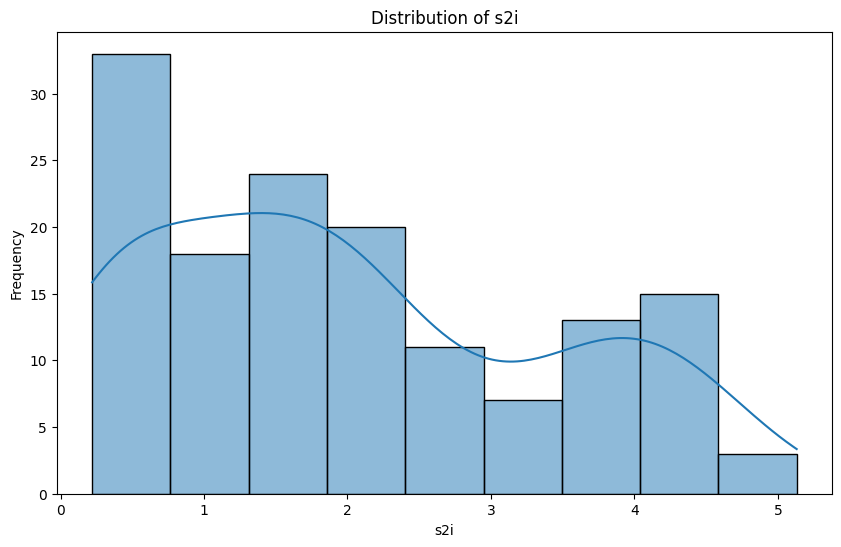


Analysis for column: s2s
Descriptive Statistics:
count    144.000000
mean       0.316296
std        0.131798
min        0.064260
25%        0.228353
50%        0.293760
75%        0.387855
max        0.959310
Name: s2s, dtype: float64


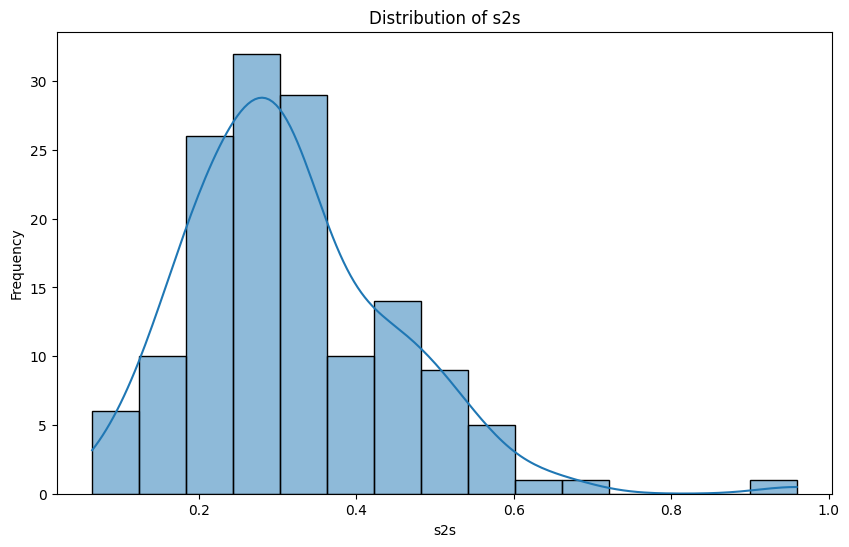


Analysis for column: s3a
Descriptive Statistics:
count    144.000000
mean       2.681154
std        1.393045
min        0.365200
25%        1.447733
50%        2.583010
75%        3.805445
max        5.736570
Name: s3a, dtype: float64


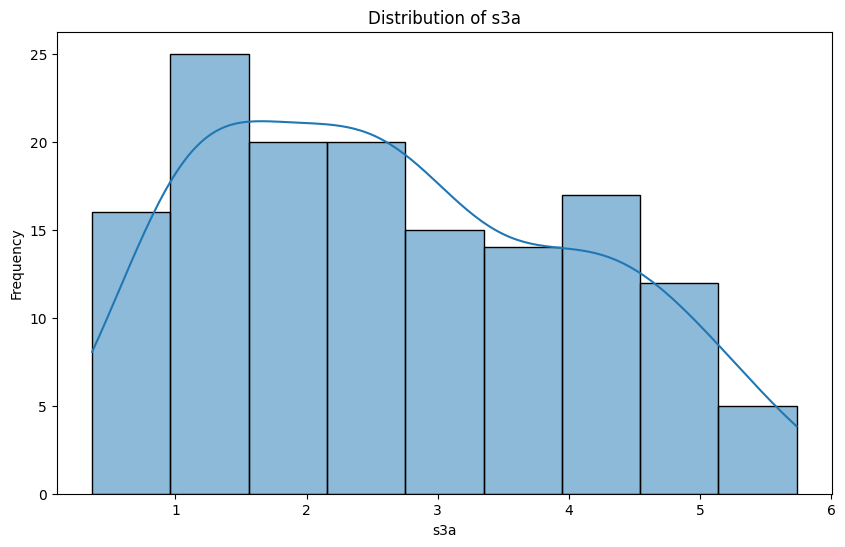


Analysis for column: s3x
Descriptive Statistics:
count    144.000000
mean       3.471169
std        1.430404
min        0.956920
25%        2.275683
50%        3.342160
75%        4.580650
max        6.415450
Name: s3x, dtype: float64


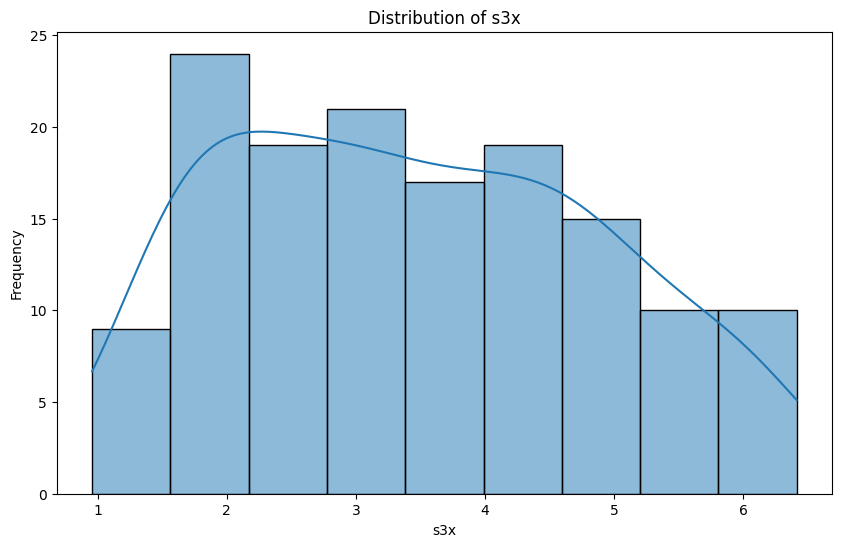


Analysis for column: s3i
Descriptive Statistics:
count    144.000000
mean       1.880372
std        1.233475
min        0.223000
25%        0.819310
50%        1.667905
75%        2.940798
max        5.222830
Name: s3i, dtype: float64


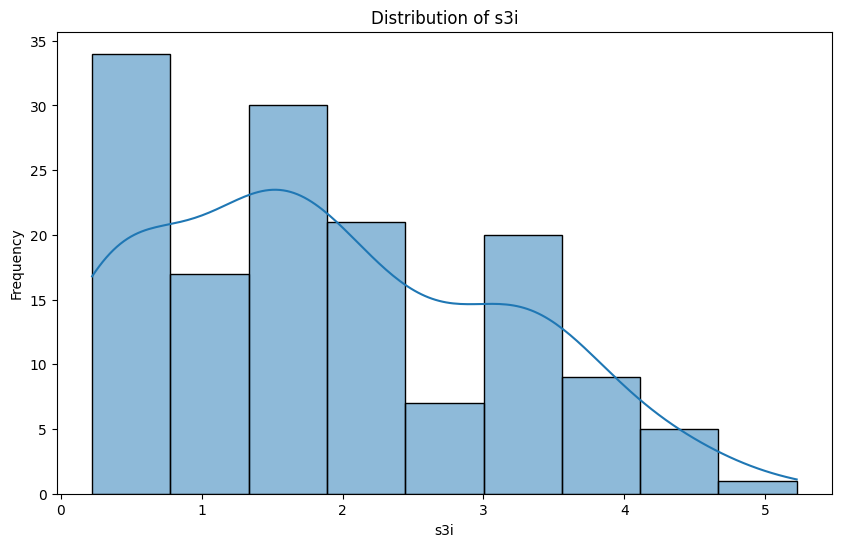


Analysis for column: s3s
Descriptive Statistics:
count    144.000000
mean       0.320676
std        0.136369
min        0.077980
25%        0.224760
50%        0.293570
75%        0.391038
max        1.027490
Name: s3s, dtype: float64


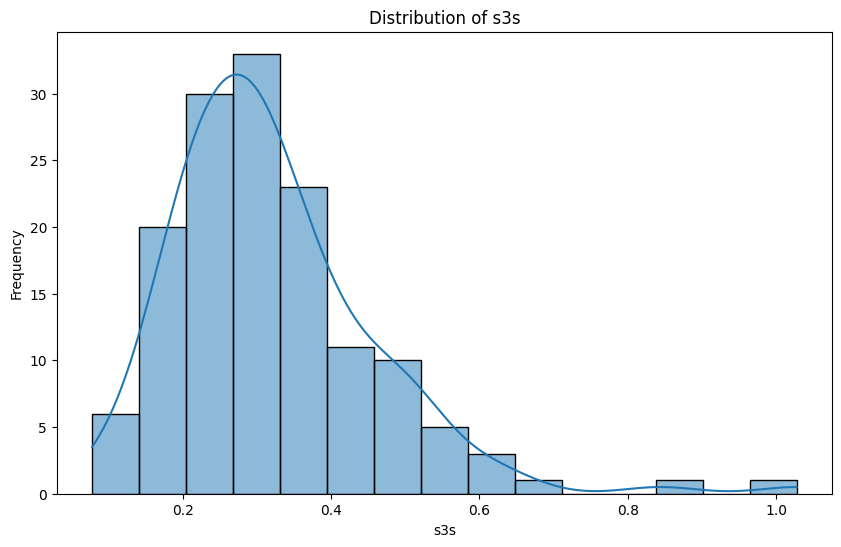


Analysis for column: d1a
Descriptive Statistics:
count    144.000000
mean     216.090278
std       98.576364
min        6.000000
25%      179.000000
50%      207.000000
75%      314.500000
max      358.000000
Name: d1a, dtype: float64


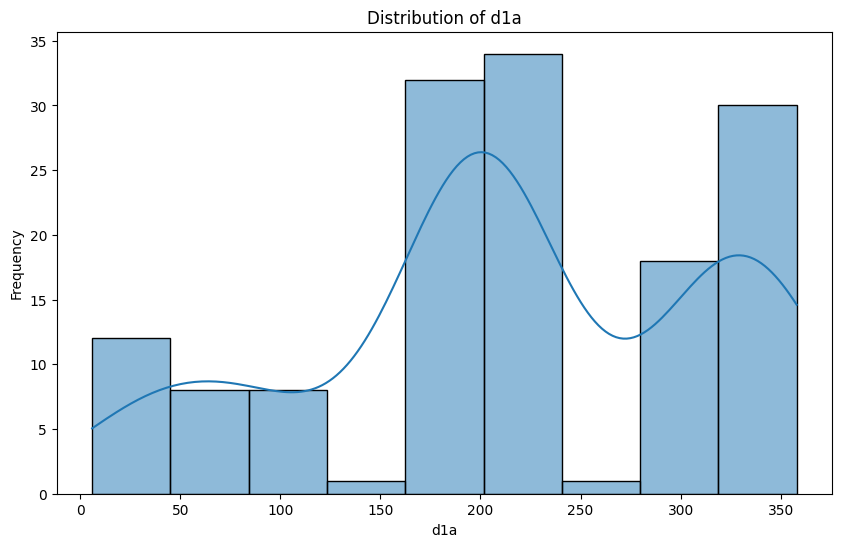


Analysis for column: d1s
Descriptive Statistics:
count    144.000000
mean      11.090278
std       14.976398
min        1.000000
25%        4.000000
50%        6.000000
75%       11.000000
max       99.000000
Name: d1s, dtype: float64


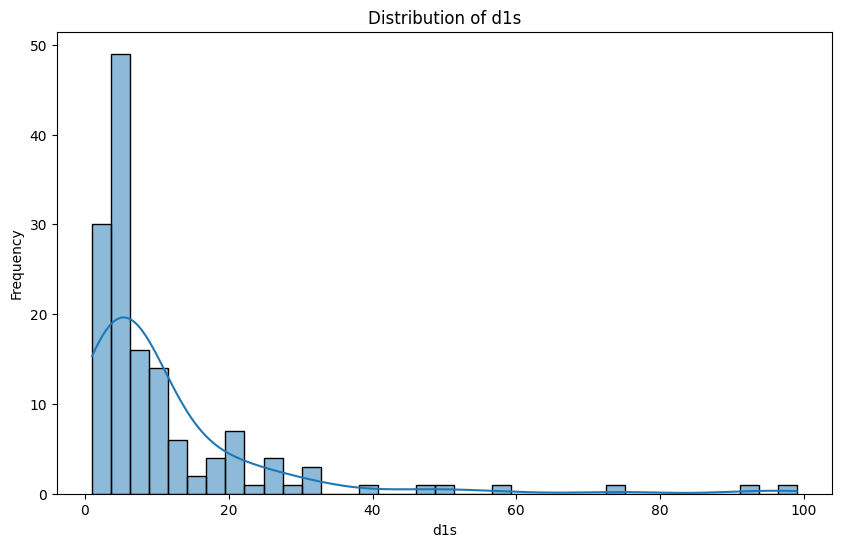


Analysis for column: d2a
Descriptive Statistics:
count    144.000000
mean     217.604167
std       97.704222
min        2.000000
25%      178.750000
50%      208.500000
75%      311.000000
max      359.000000
Name: d2a, dtype: float64


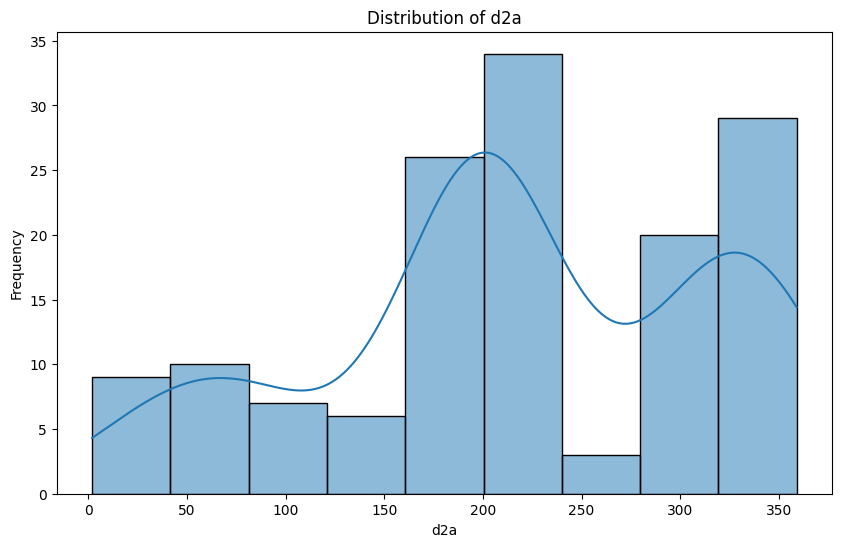


Analysis for column: d2s
Descriptive Statistics:
count    144.000000
mean      11.222222
std       11.749986
min        2.000000
25%        5.000000
50%        7.000000
75%       12.000000
max       72.000000
Name: d2s, dtype: float64


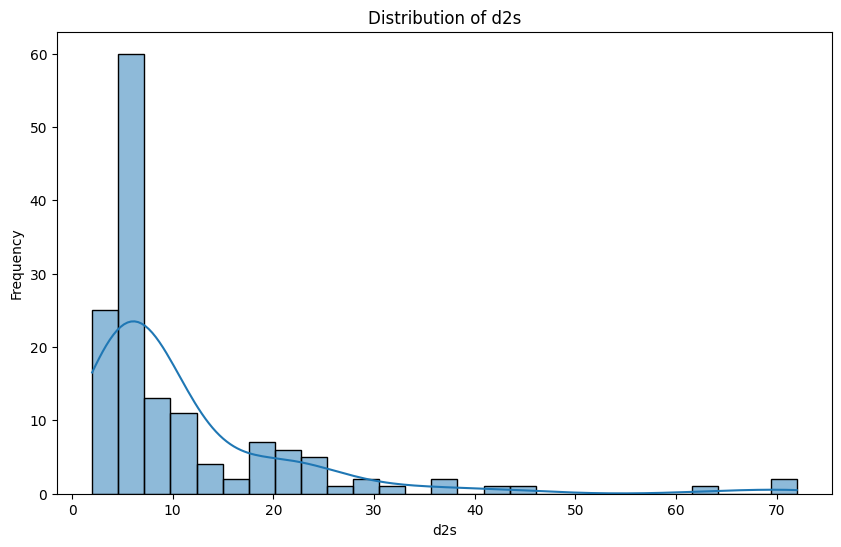


Analysis for column: h1a
Descriptive Statistics:
count    144.000000
mean      98.736111
std        4.816908
min       88.000000
25%       94.000000
50%       99.500000
75%      103.000000
max      104.000000
Name: h1a, dtype: float64


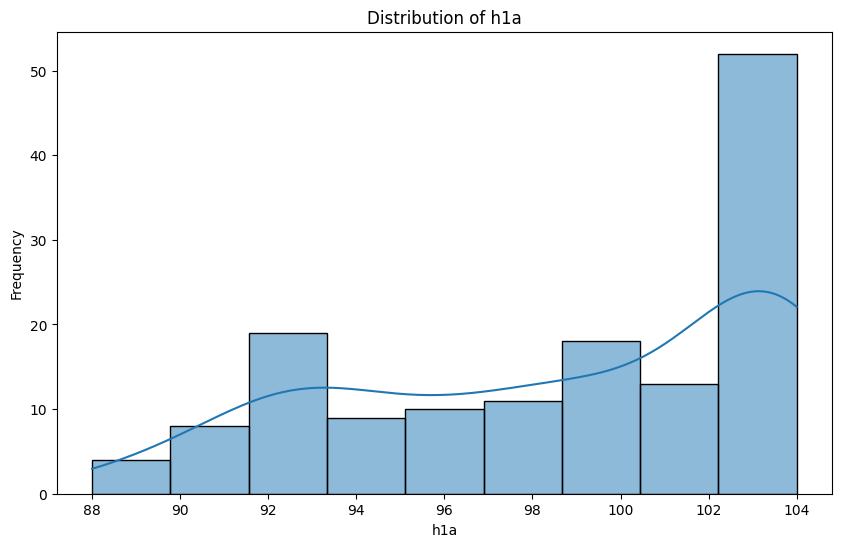


Analysis for column: h1x
Descriptive Statistics:
count    144.000000
mean      99.076389
std        4.700959
min       89.000000
25%       94.000000
50%      100.000000
75%      103.250000
max      104.000000
Name: h1x, dtype: float64


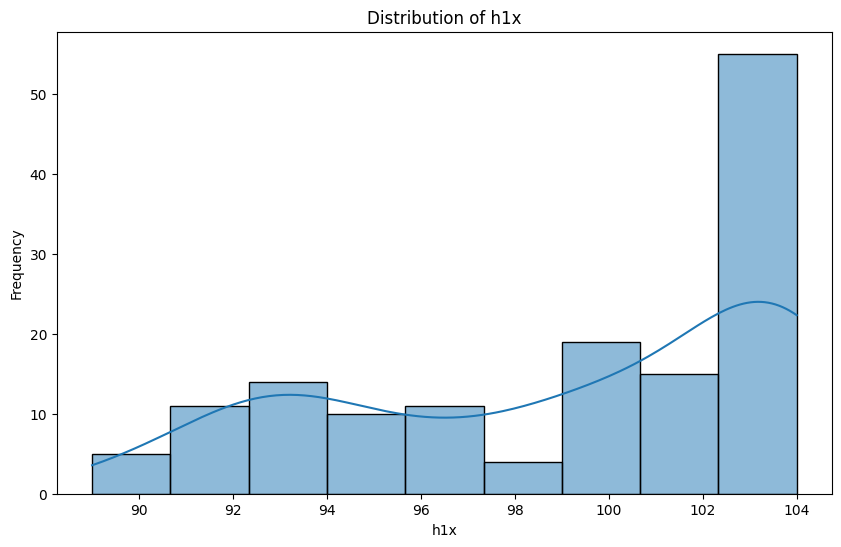


Analysis for column: h1i
Descriptive Statistics:
count    144.000000
mean      98.437500
std        4.902859
min       88.000000
25%       94.000000
50%       99.000000
75%      103.000000
max      104.000000
Name: h1i, dtype: float64


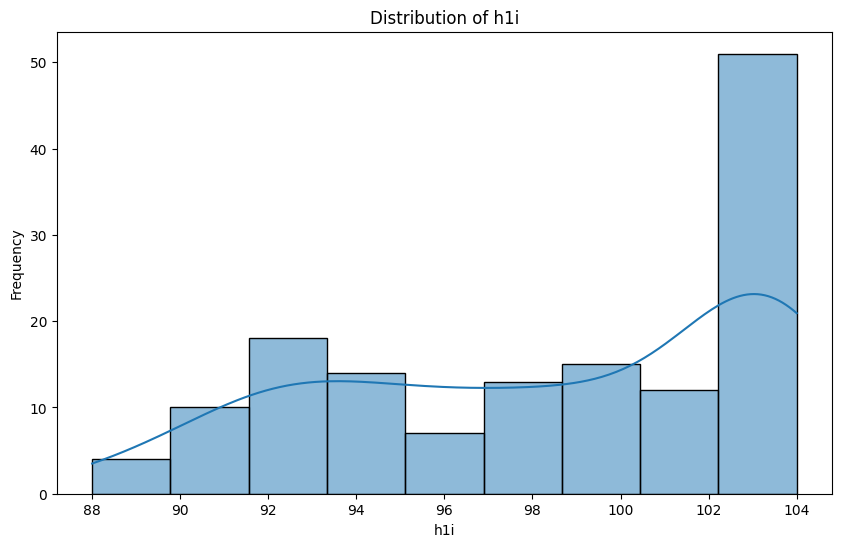


Analysis for column: t1a
Descriptive Statistics:
count    144.000000
mean       2.758333
std        1.586812
min        0.350000
25%        0.950000
50%        3.400000
75%        4.375000
max        4.750000
Name: t1a, dtype: float64


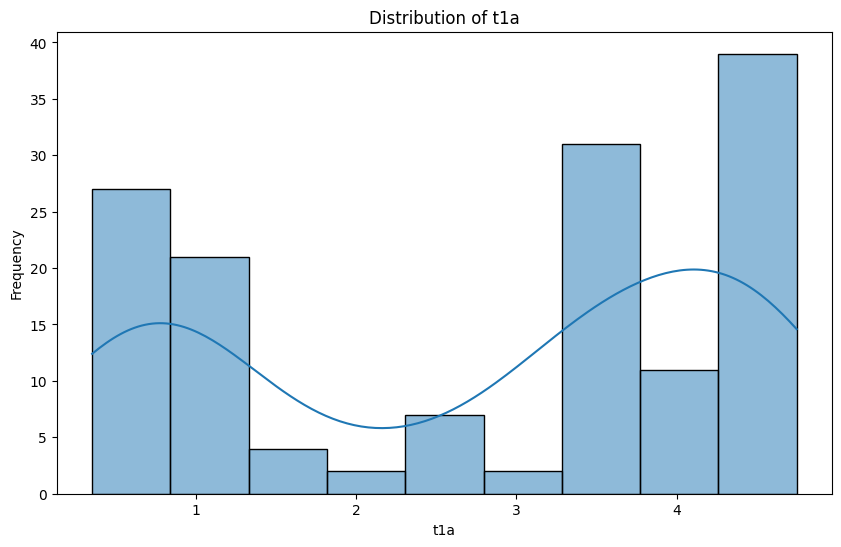


Analysis for column: t1x
Descriptive Statistics:
count    144.000000
mean       2.821528
std        1.591879
min        0.450000
25%        1.050000
50%        3.450000
75%        4.450000
max        4.850000
Name: t1x, dtype: float64


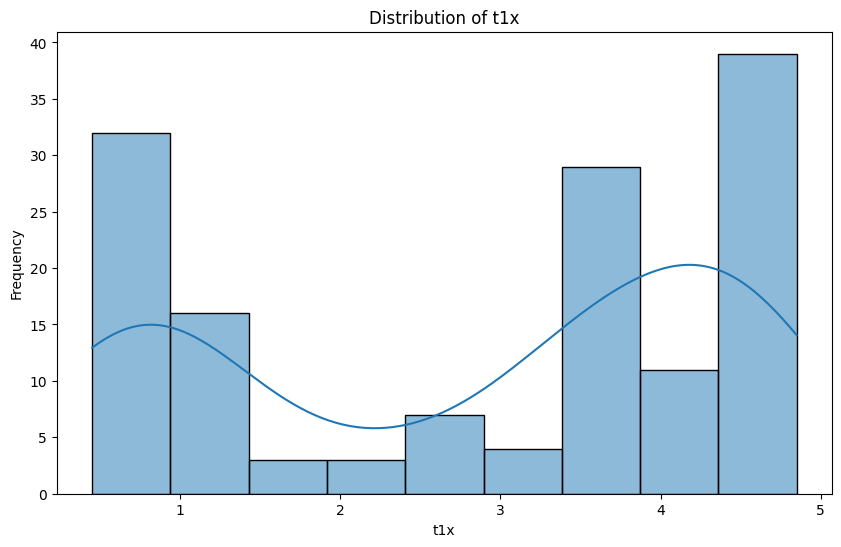


Analysis for column: t1i
Descriptive Statistics:
count    144.000000
mean       2.690972
std        1.571531
min        0.350000
25%        0.850000
50%        3.350000
75%        4.250000
max        4.550000
Name: t1i, dtype: float64


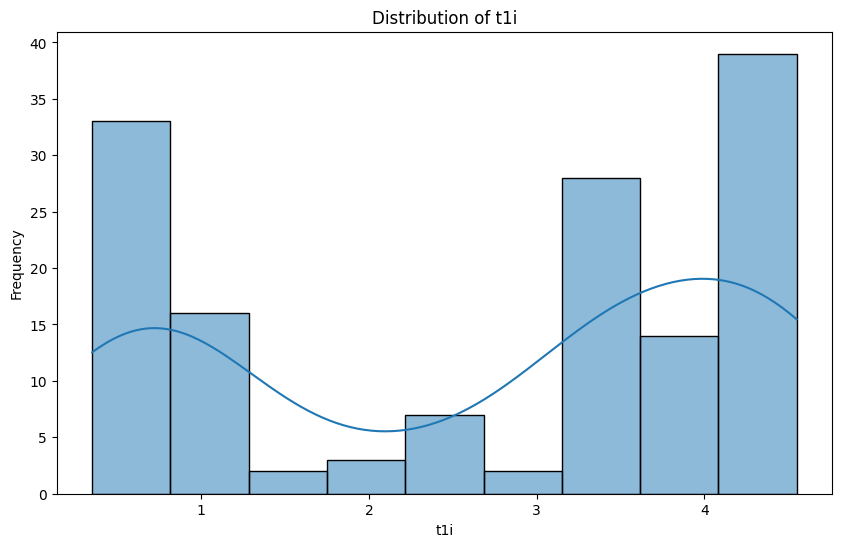


Analysis for column: b1a
Descriptive Statistics:
count     144.000000
mean     1004.888889
std         2.247333
min      1001.000000
25%      1003.000000
50%      1005.000000
75%      1007.000000
max      1008.000000
Name: b1a, dtype: float64


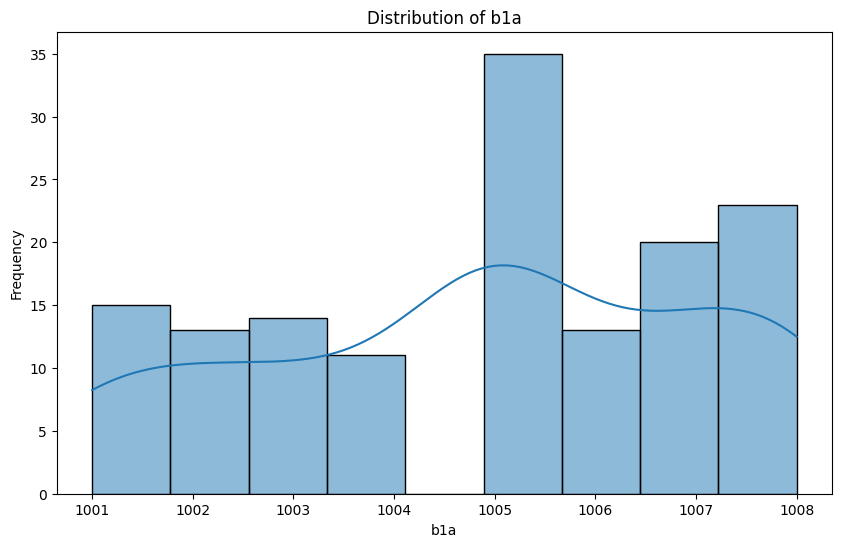


Analysis for column: b1x
Descriptive Statistics:
count     144.000000
mean     1005.284722
std         2.270711
min      1001.000000
25%      1003.000000
50%      1006.000000
75%      1007.000000
max      1008.000000
Name: b1x, dtype: float64


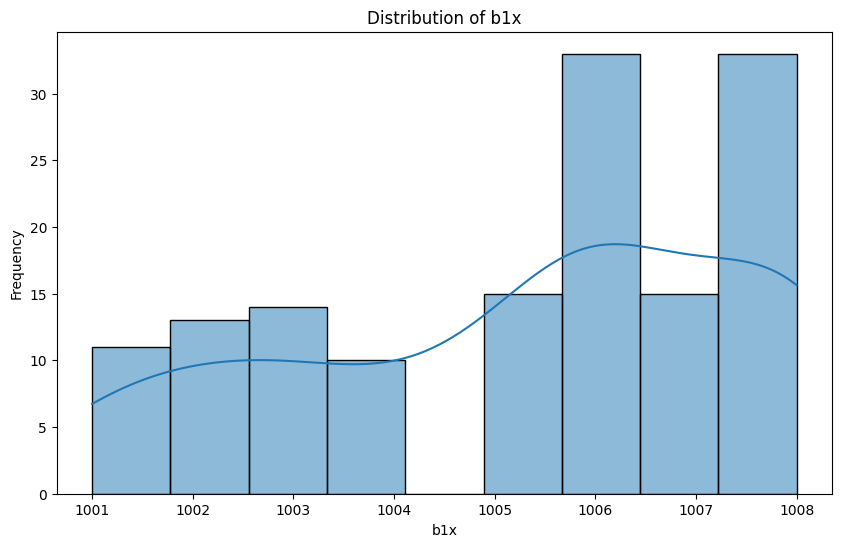


Analysis for column: b1i
Descriptive Statistics:
count     144.000000
mean     1004.506944
std         2.212477
min      1000.000000
25%      1003.000000
50%      1005.000000
75%      1007.000000
max      1007.000000
Name: b1i, dtype: float64


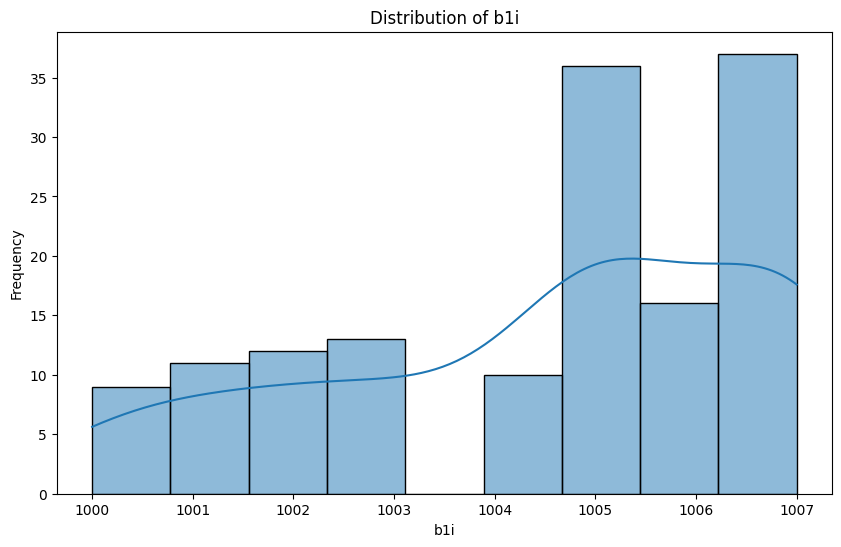


Analysis for column: p1a
Descriptive Statistics:
count    144.000000
mean       2.541740
std        1.254076
min        0.567290
25%        1.431567
50%        2.451730
75%        3.372167
max        5.762100
Name: p1a, dtype: float64


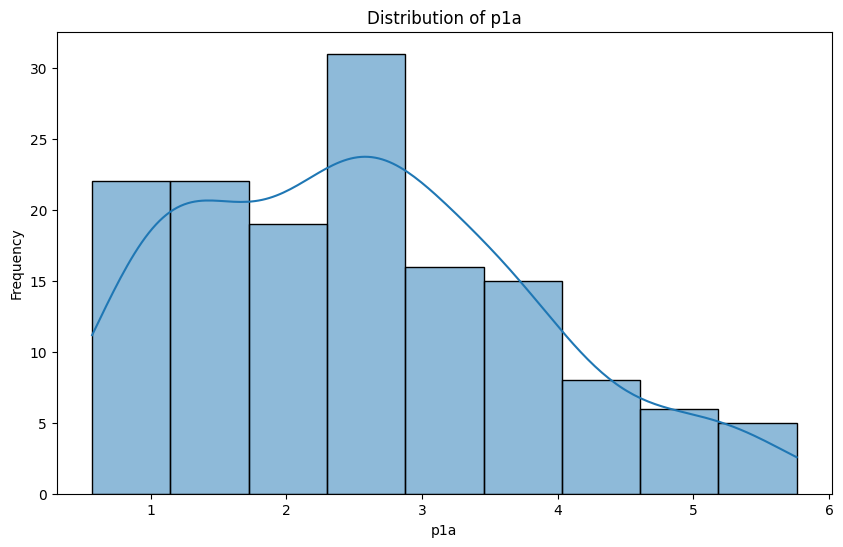


Analysis for column: p1x
Descriptive Statistics:
count    144.000000
mean       3.361402
std        1.331966
min        1.145000
25%        2.199550
50%        3.299950
75%        4.262800
max        6.371900
Name: p1x, dtype: float64


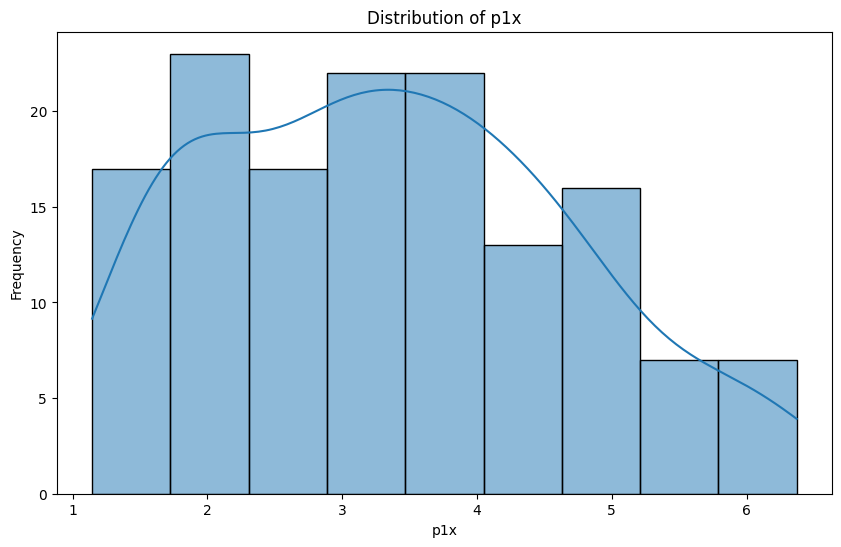


Analysis for column: p1i
Descriptive Statistics:
count    144.000000
mean       1.707936
std        1.039710
min        0.228000
25%        0.812588
50%        1.718125
75%        2.291250
max        5.225650
Name: p1i, dtype: float64


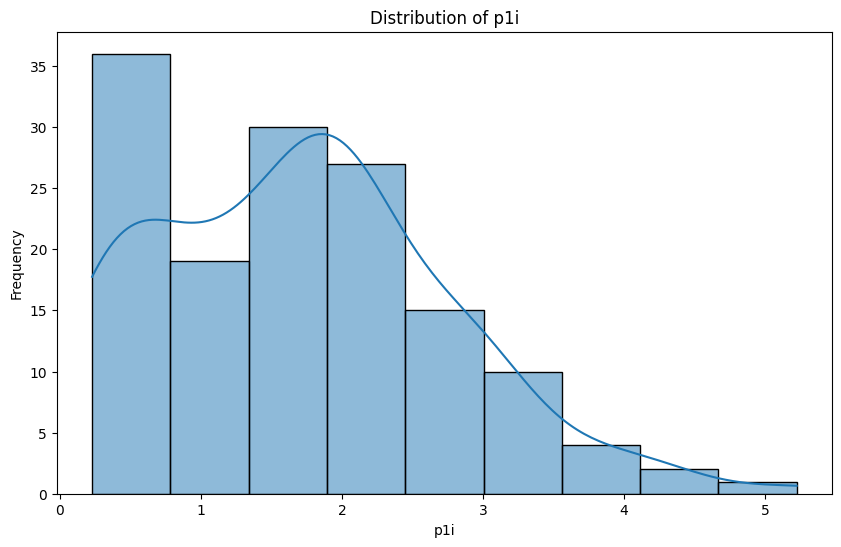


Analysis for column: p1s
Descriptive Statistics:
count    144.000000
mean       0.339197
std        0.131060
min        0.105460
25%        0.243010
50%        0.332415
75%        0.417240
max        1.013290
Name: p1s, dtype: float64


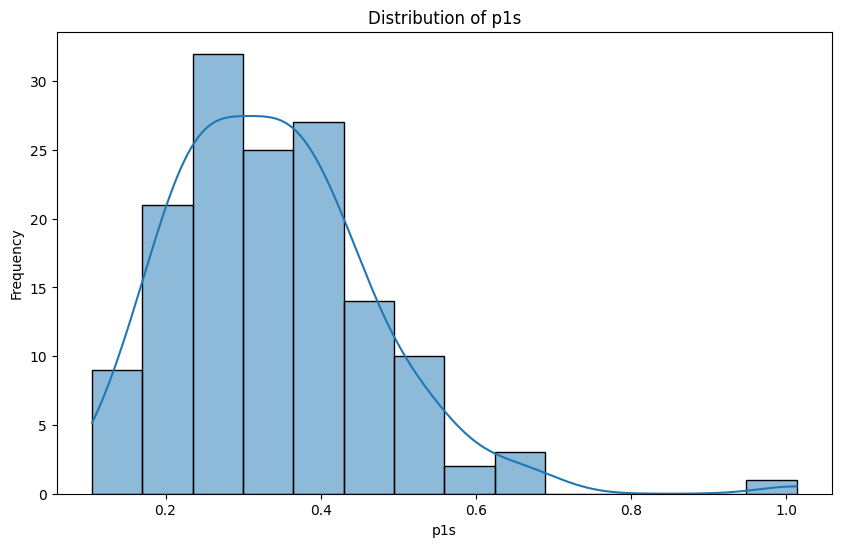


Analysis for column: tia
Descriptive Statistics:
count    144.000000
mean      44.152778
std        2.188078
min       41.000000
25%       42.000000
50%       44.000000
75%       45.250000
max       48.000000
Name: tia, dtype: float64


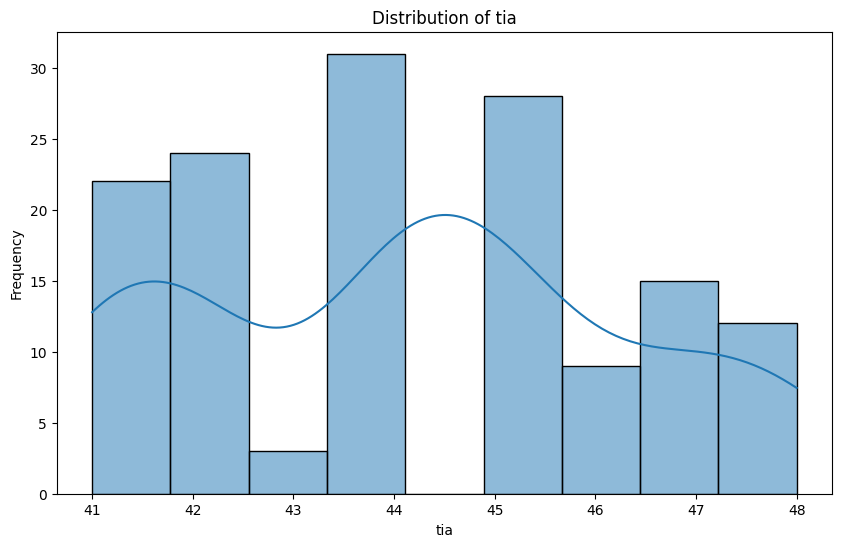


Analysis for column: tix
Descriptive Statistics:
count    144.000000
mean      44.215278
std        2.190773
min       41.000000
25%       42.000000
50%       44.000000
75%       46.000000
max       48.000000
Name: tix, dtype: float64


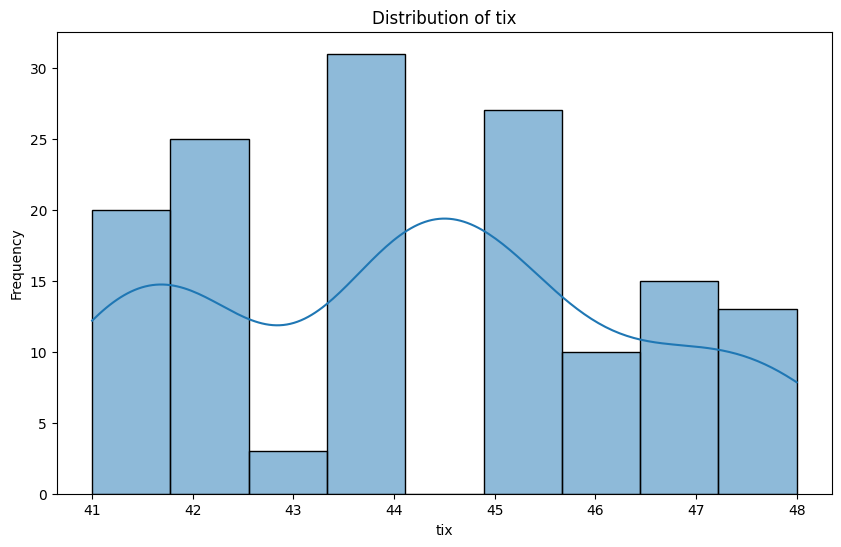


Analysis for column: tii
Descriptive Statistics:
count    144.000000
mean      44.118056
std        2.166162
min       41.000000
25%       42.000000
50%       44.000000
75%       45.250000
max       48.000000
Name: tii, dtype: float64


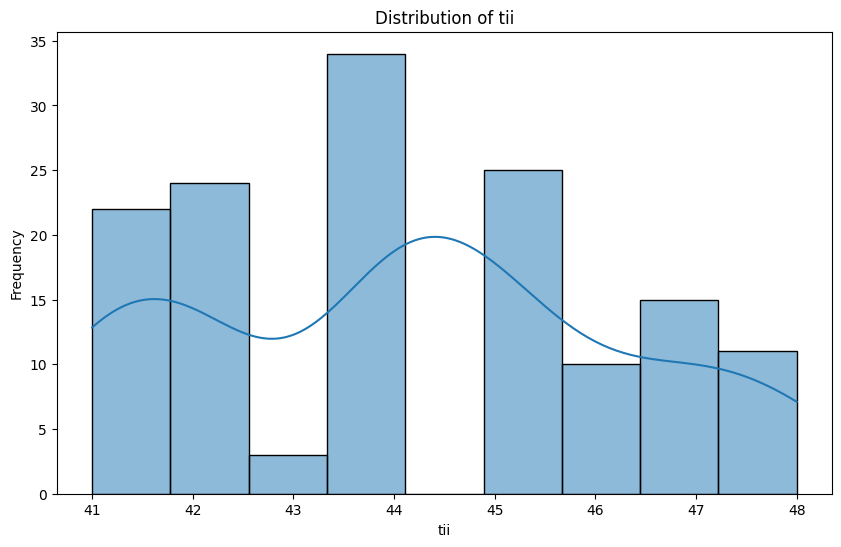


Analysis for column: vxa
Descriptive Statistics:
count    144.000000
mean     130.868056
std        6.771233
min      124.000000
25%      126.000000
50%      127.000000
75%      138.000000
max      145.000000
Name: vxa, dtype: float64


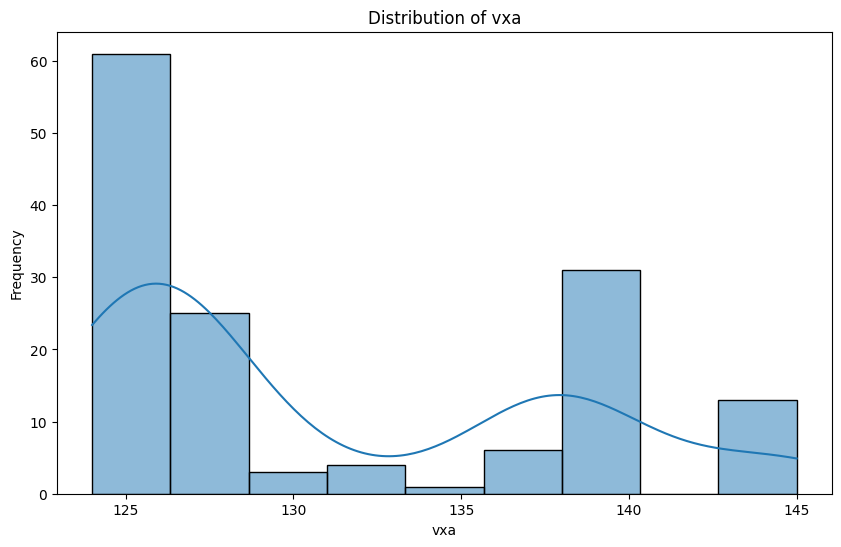


Analysis for column: vxx
Descriptive Statistics:
count    144.00000
mean     131.31250
std        7.10409
min      124.00000
25%      126.00000
50%      127.00000
75%      138.00000
max      146.00000
Name: vxx, dtype: float64


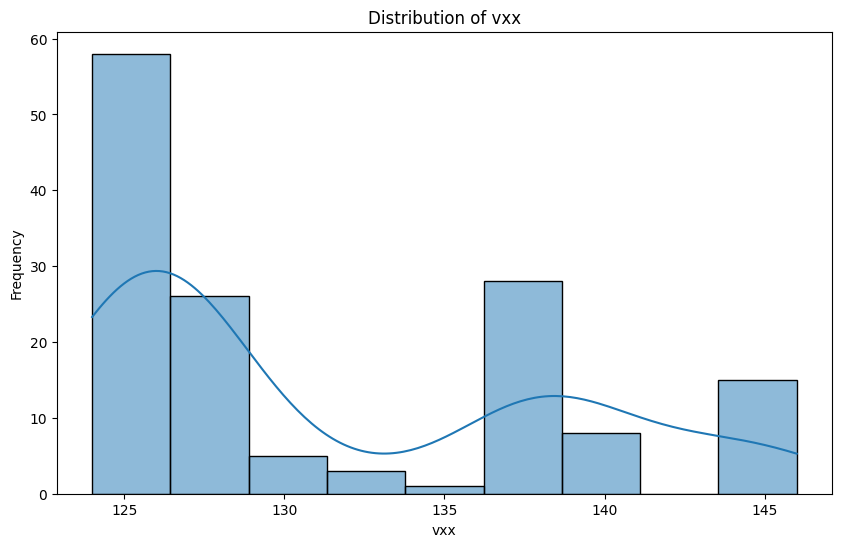


Analysis for column: vxi
Descriptive Statistics:
count    144.000000
mean     130.402778
std        6.421467
min      124.000000
25%      126.000000
50%      127.000000
75%      138.000000
max      144.000000
Name: vxi, dtype: float64


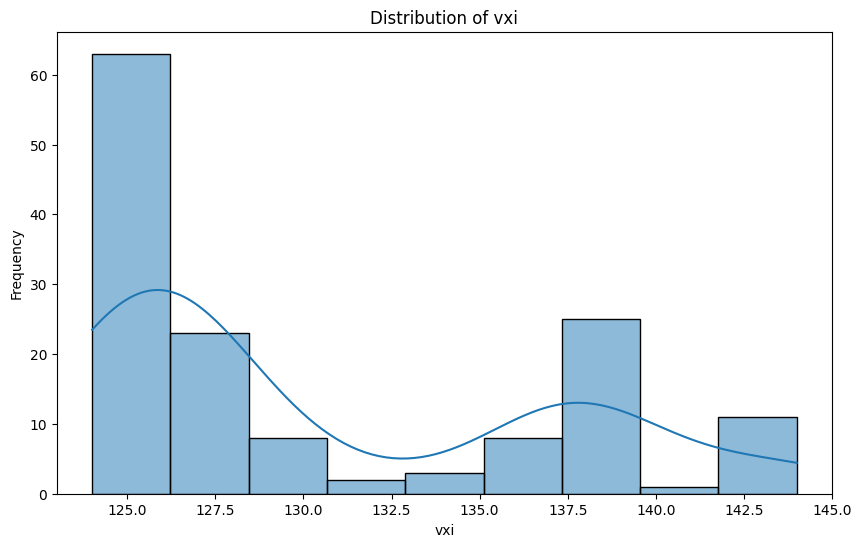


Analysis for column: bla
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bla, dtype: float64


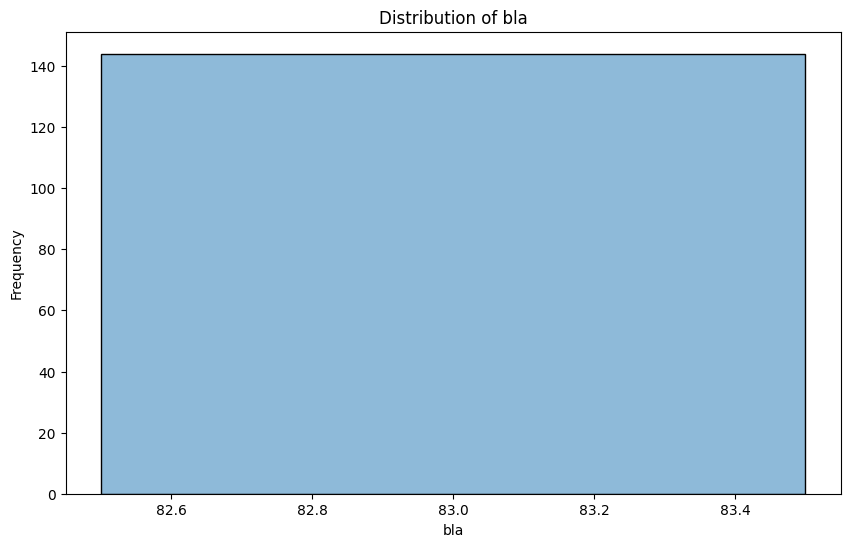


Analysis for column: blx
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: blx, dtype: float64


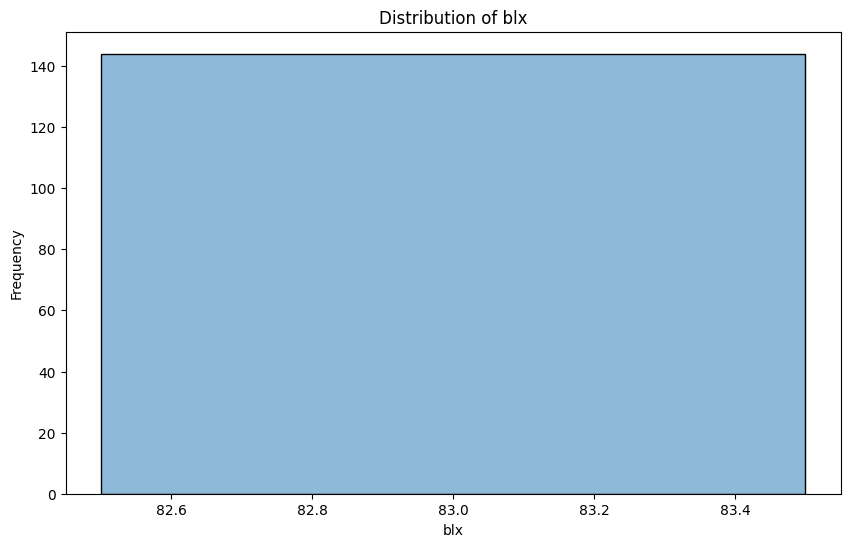


Analysis for column: bli
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bli, dtype: float64


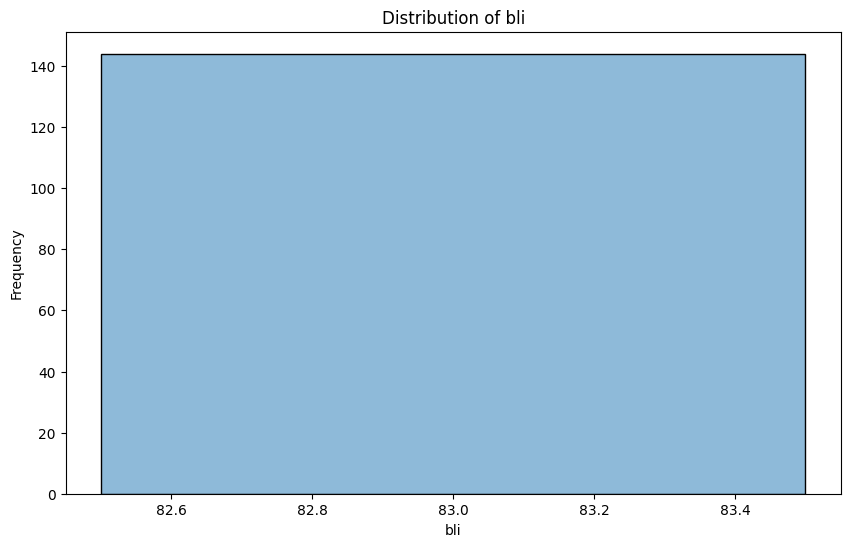


Analysis for column: bra
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bra, dtype: float64


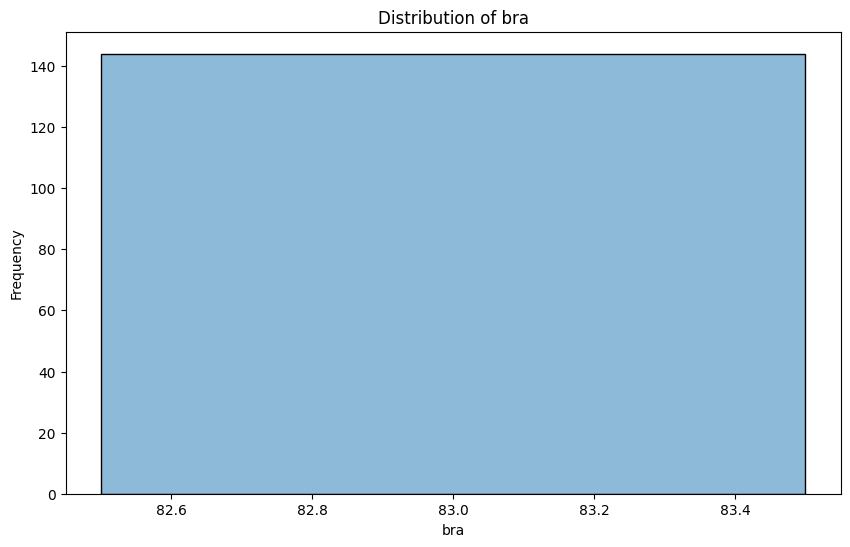


Analysis for column: brx
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: brx, dtype: float64


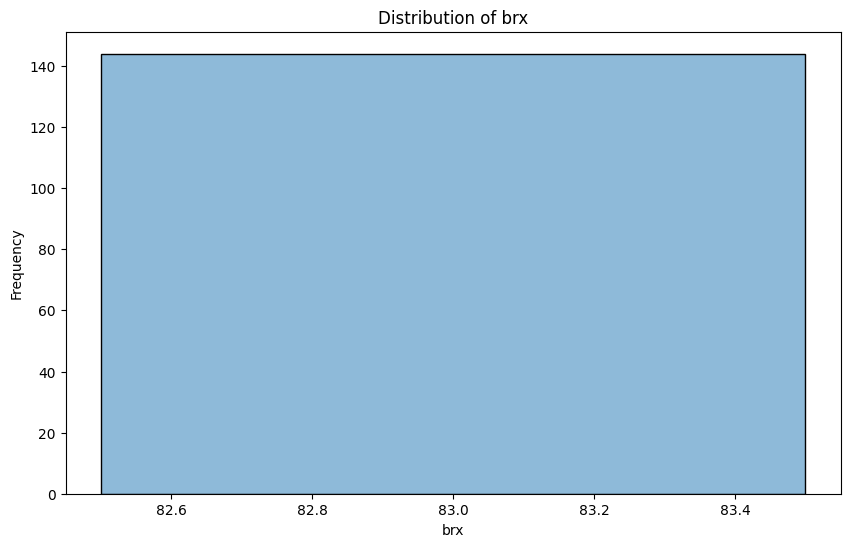


Analysis for column: bri
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bri, dtype: float64


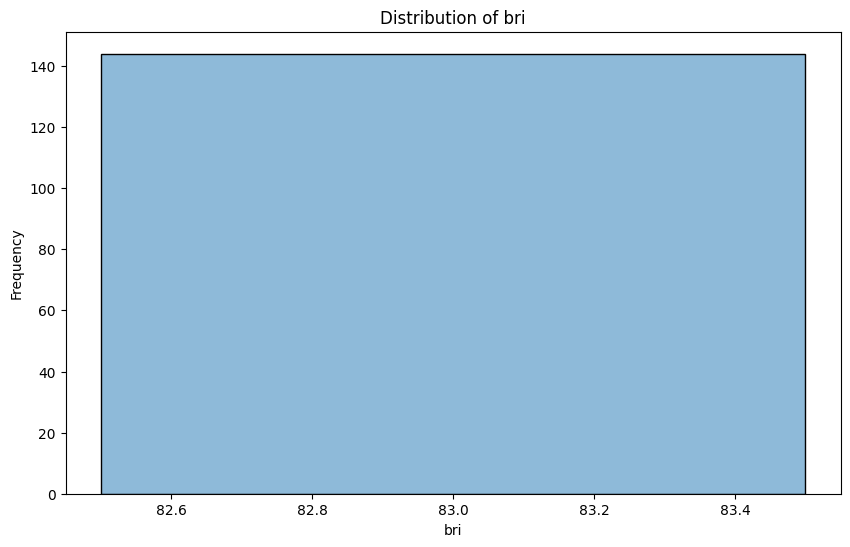

In [5]:
# Perform Statistical data analysis for each column
for column in df.columns:
    if column not in ['date', 'time', 'period']:
        print("\nAnalysis for column:", column)
        
        # Descriptive statistics
        print("Descriptive Statistics:")
        print(df[column].describe())
        
        # Data visualization
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()  

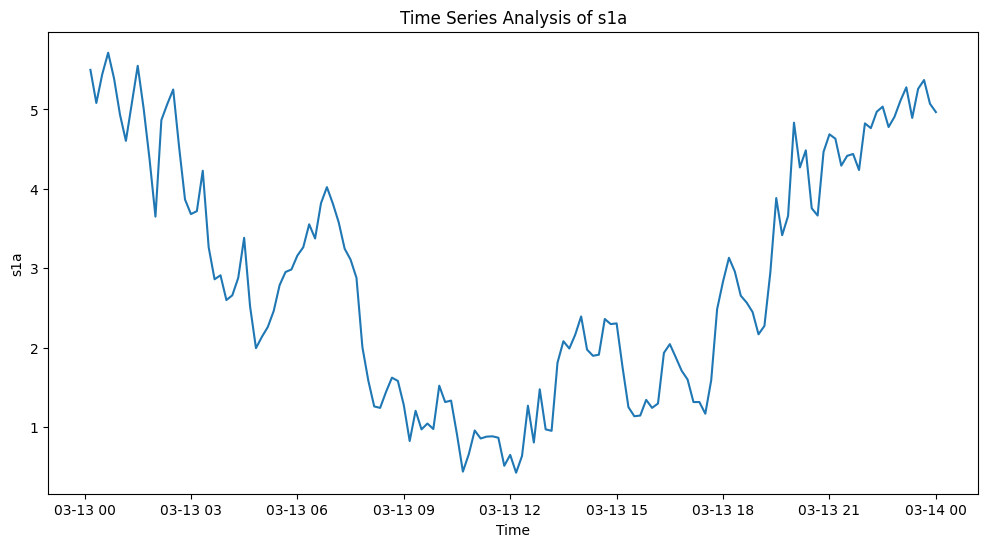

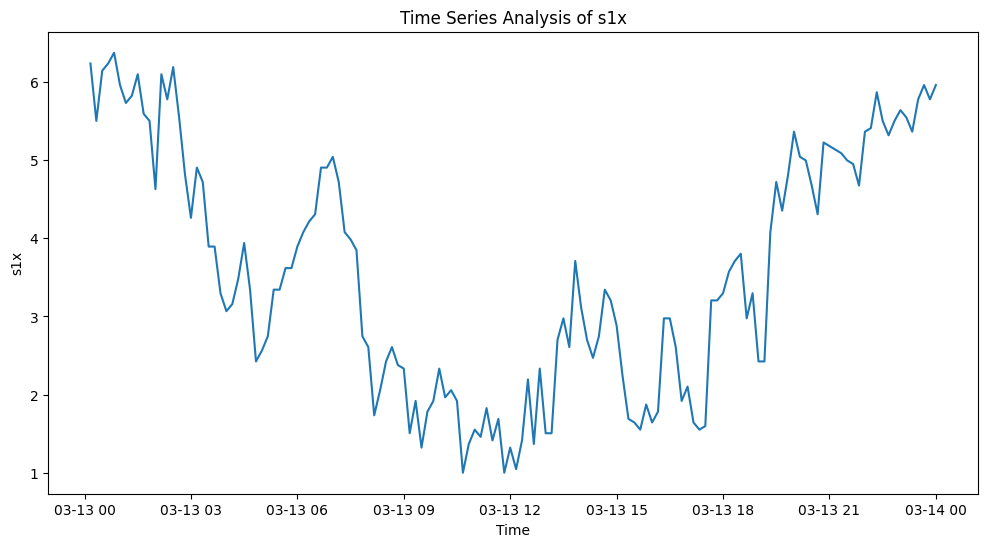

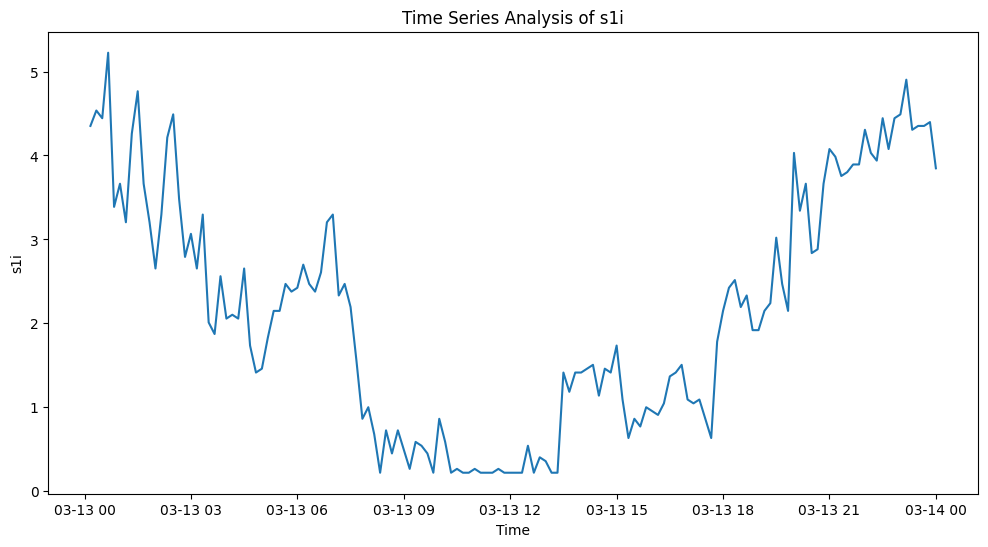

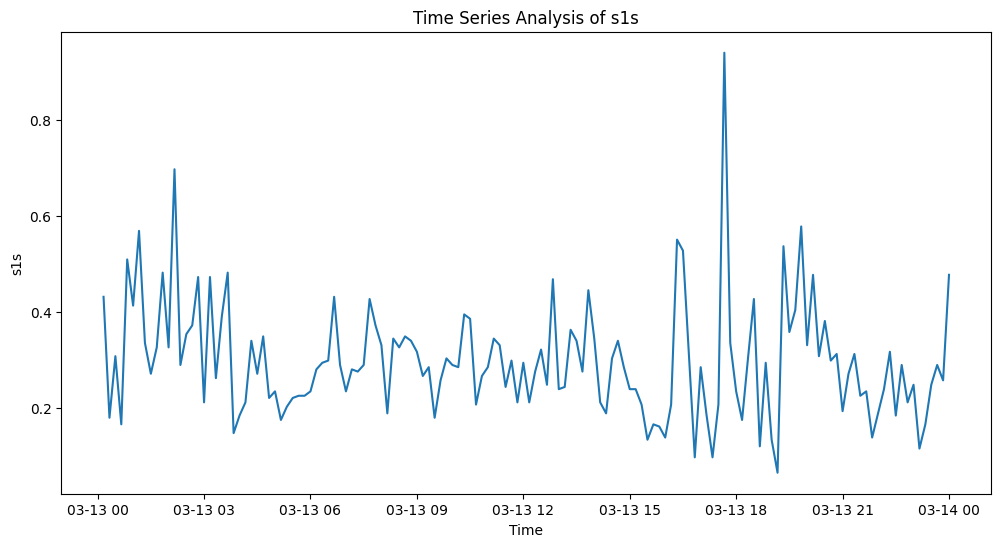

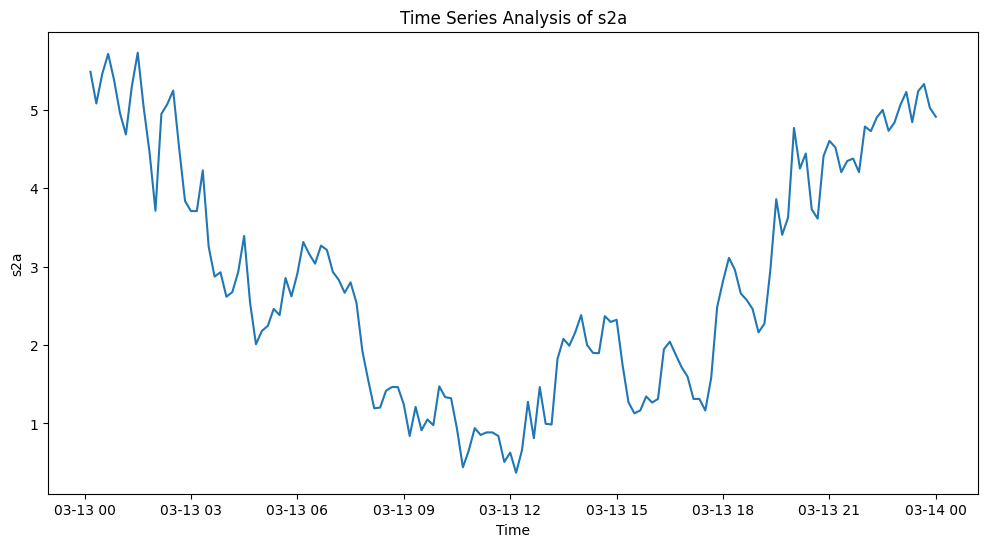

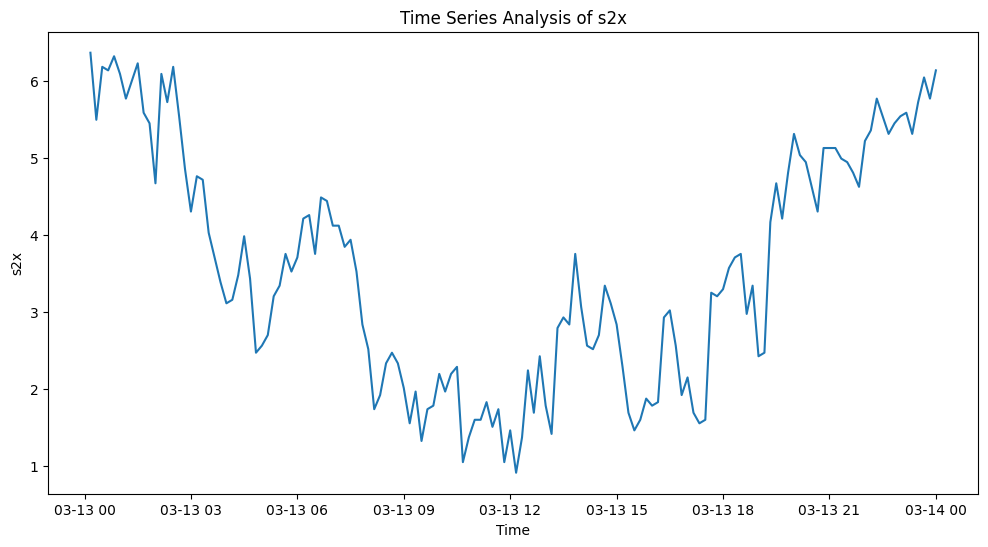

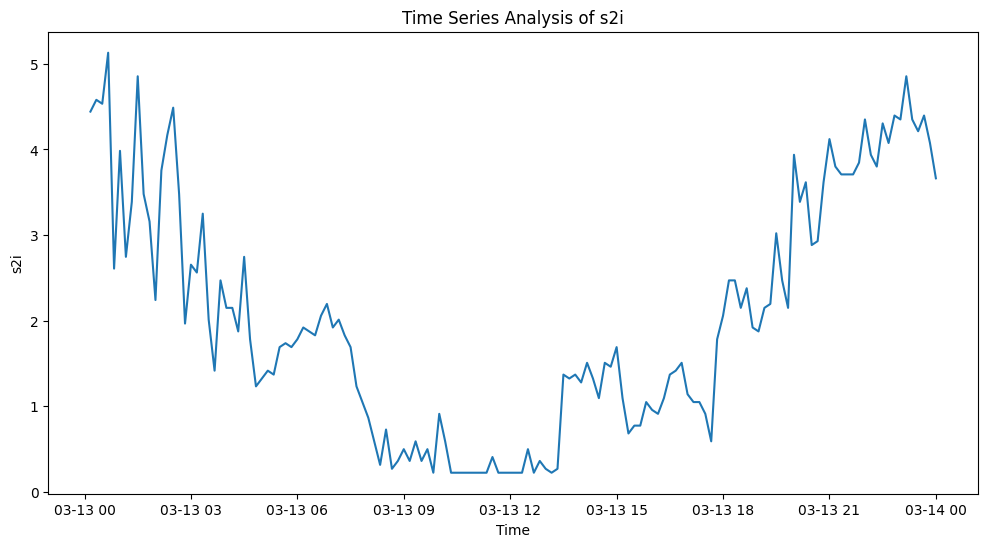

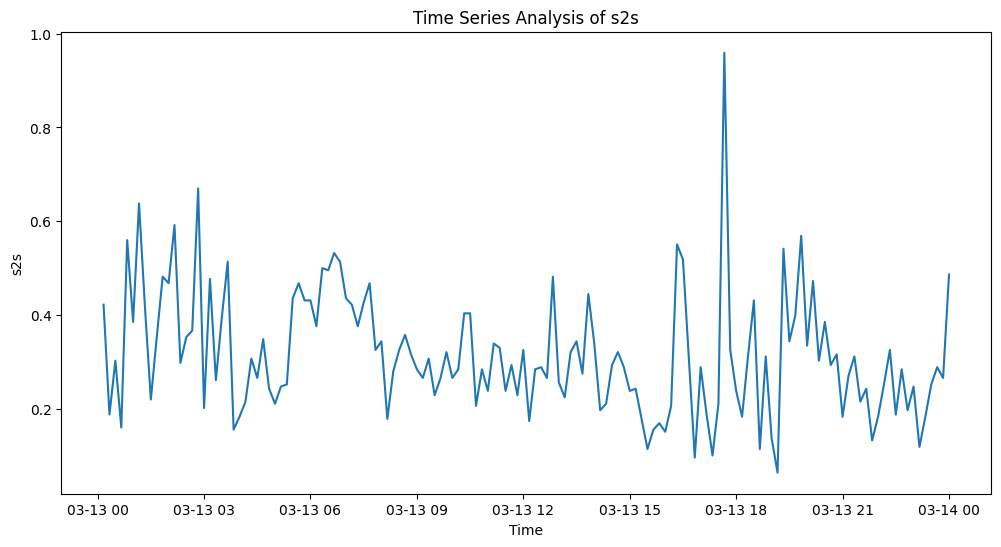

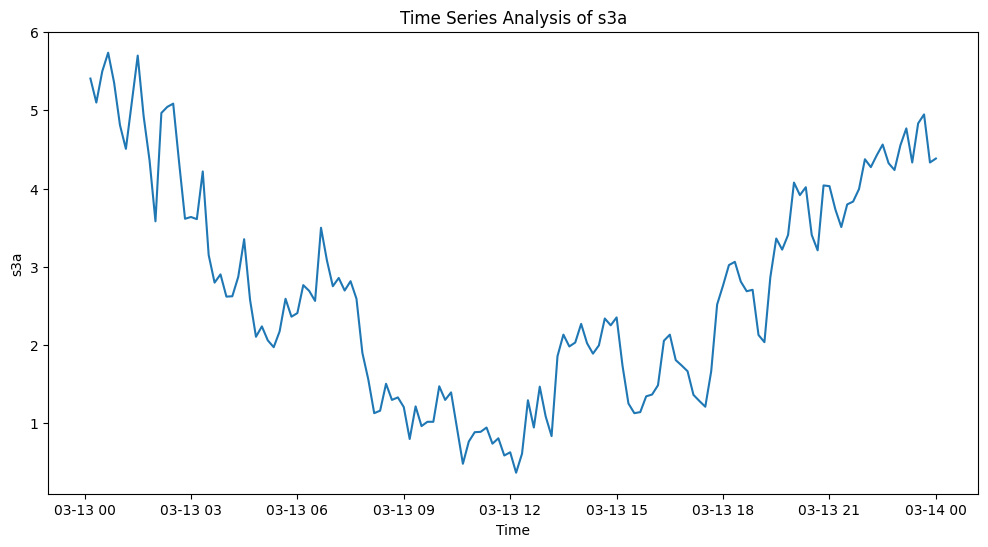

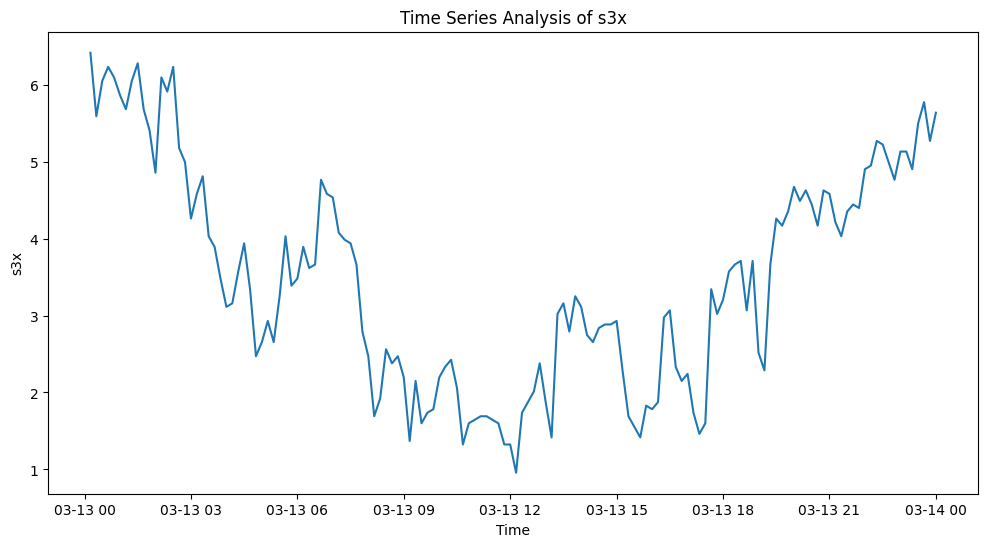

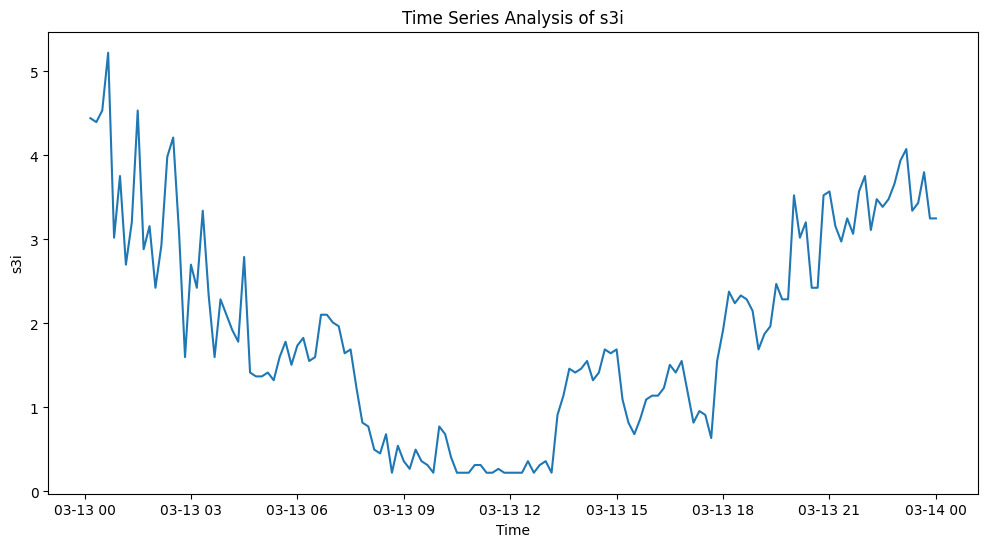

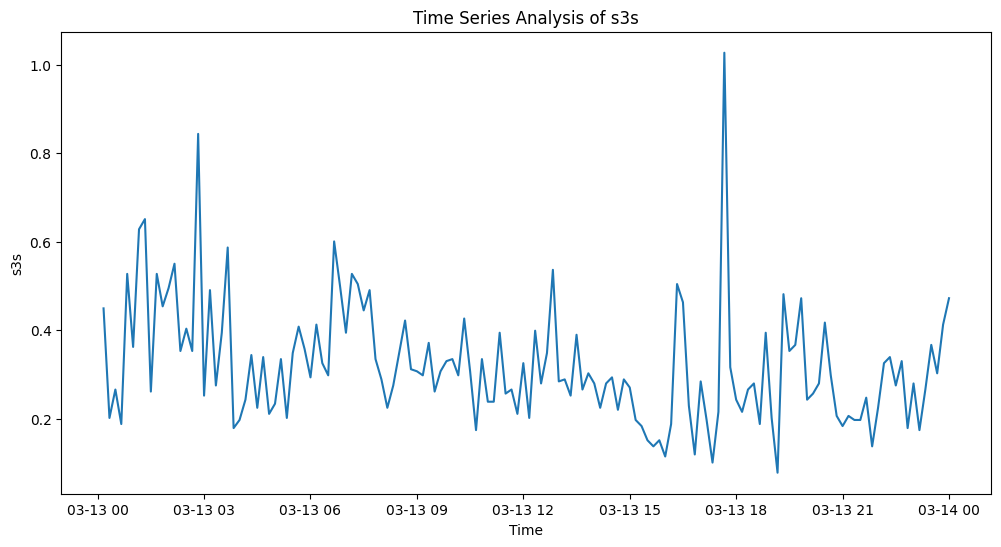

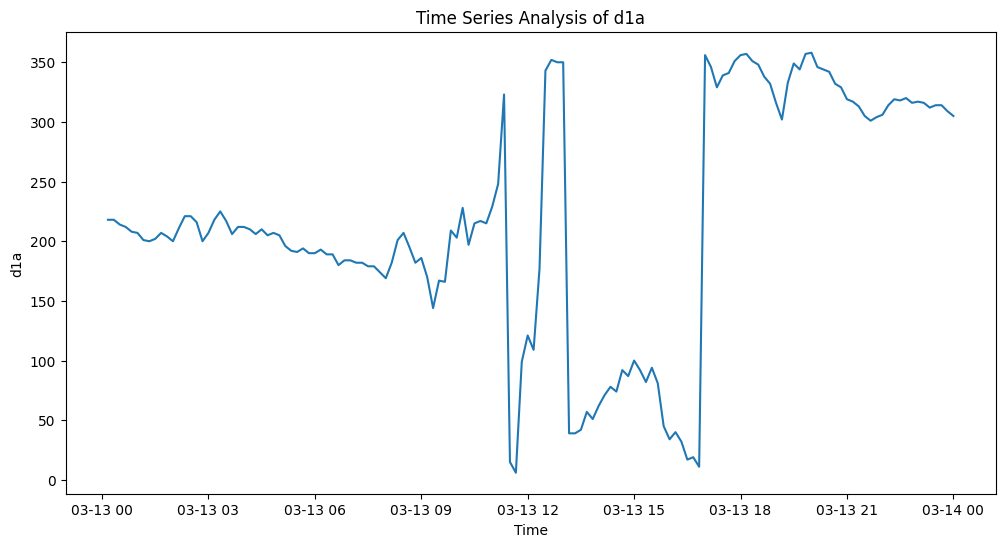

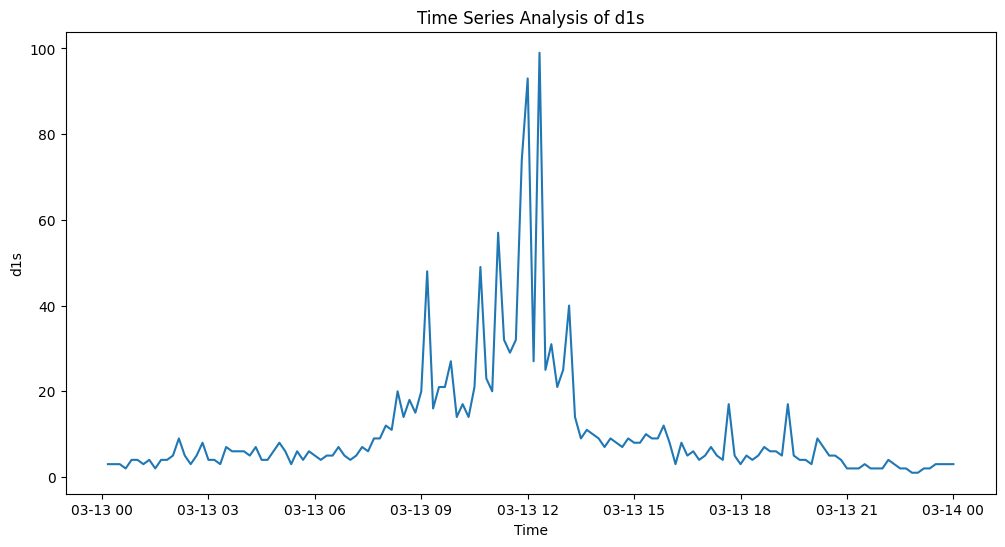

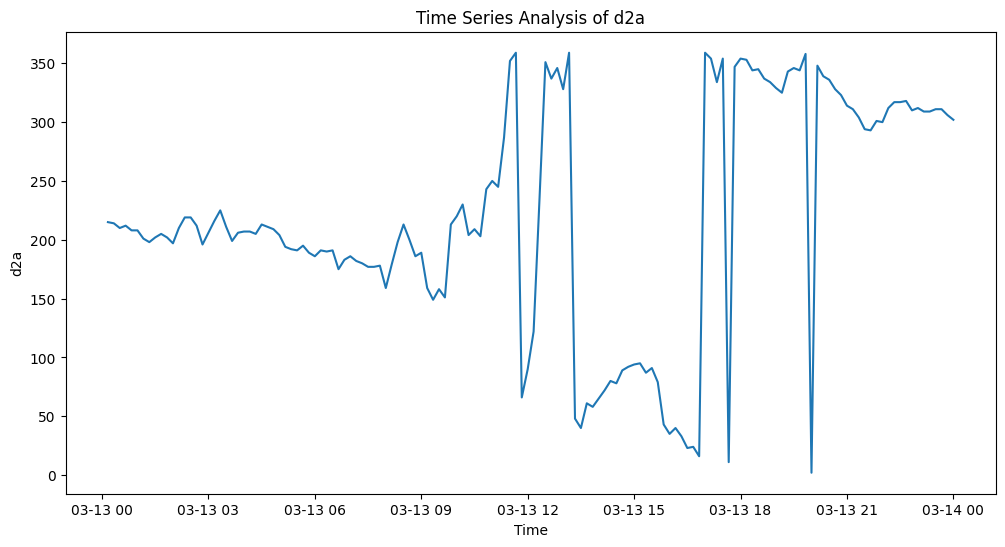

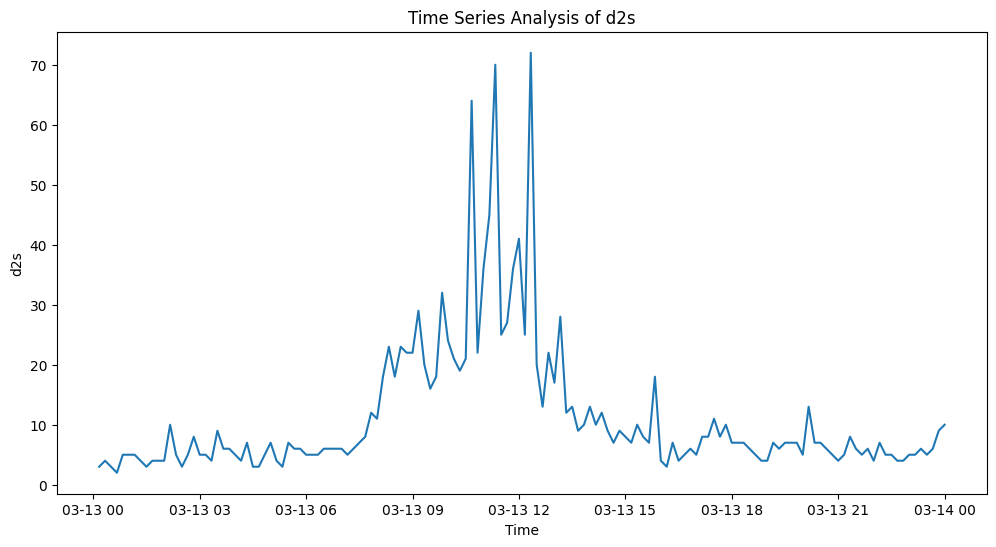

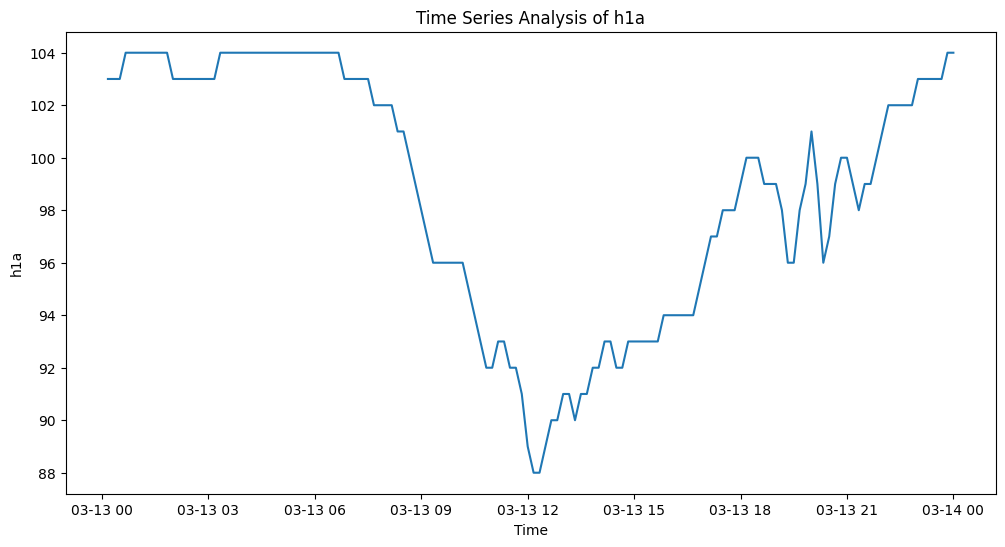

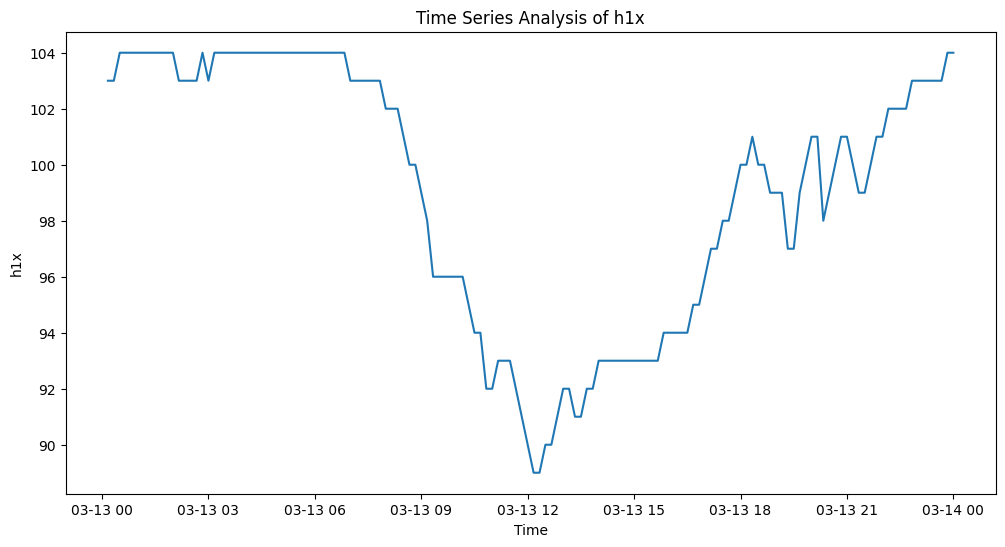

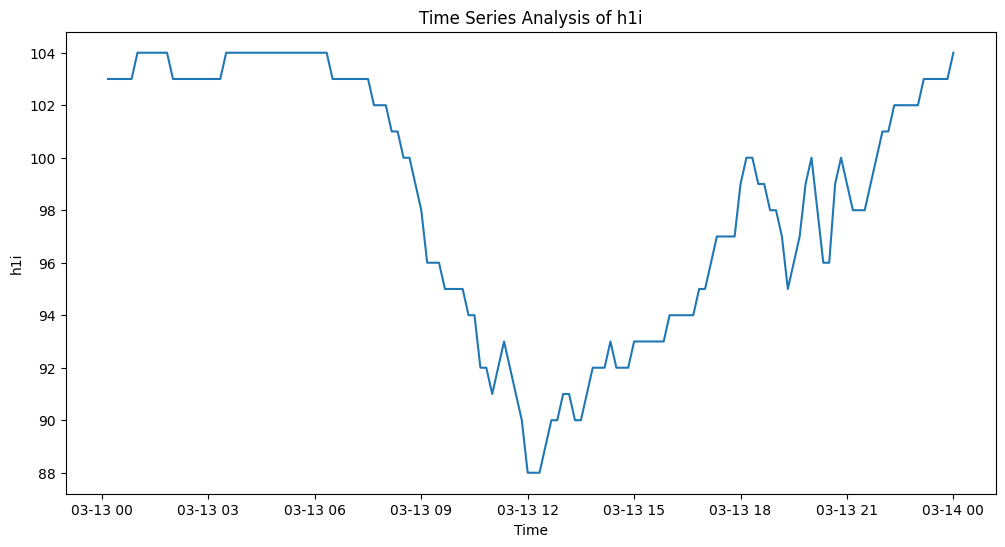

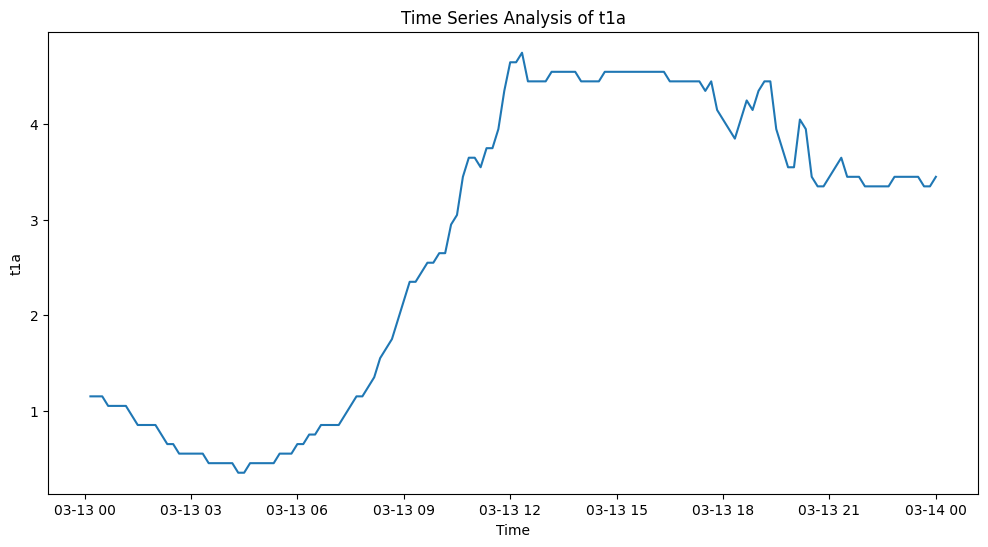

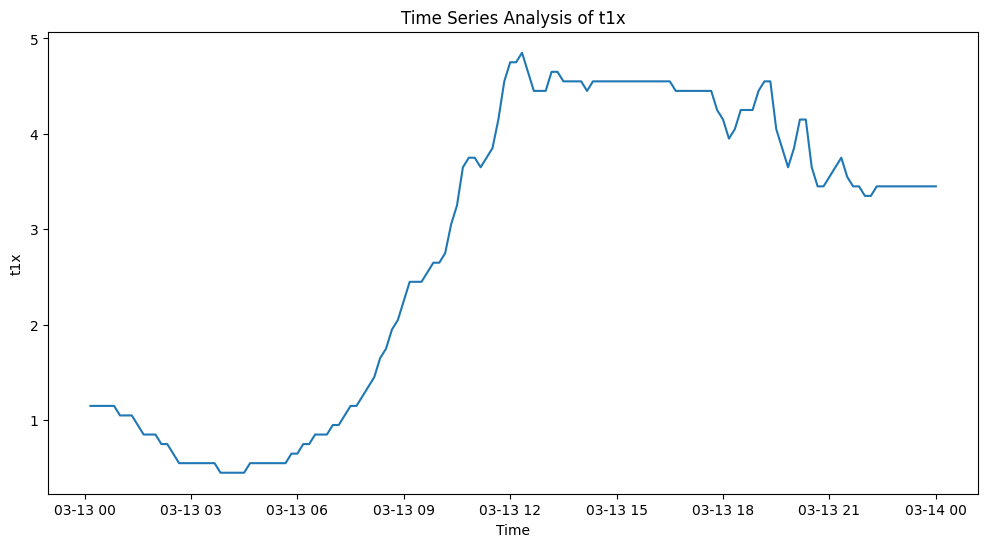

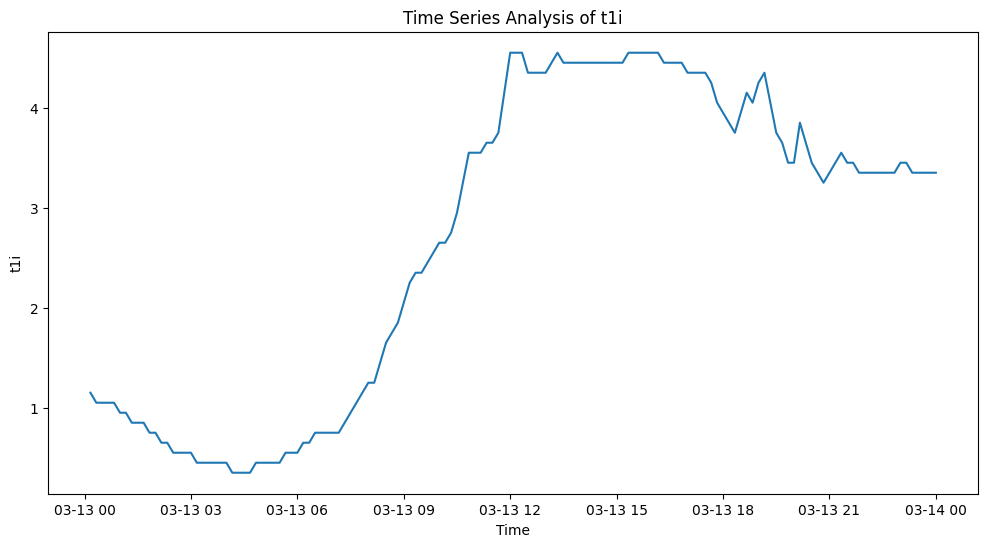

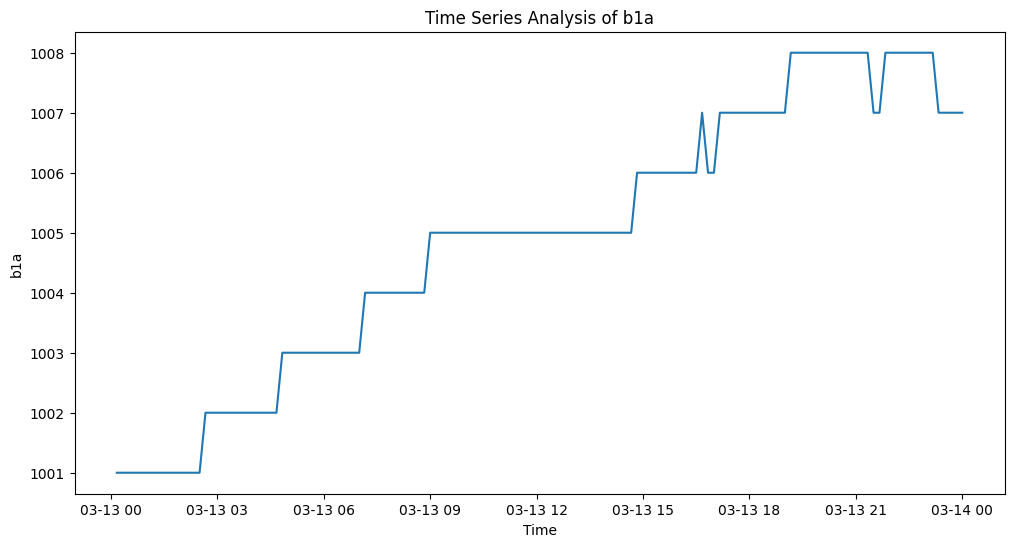

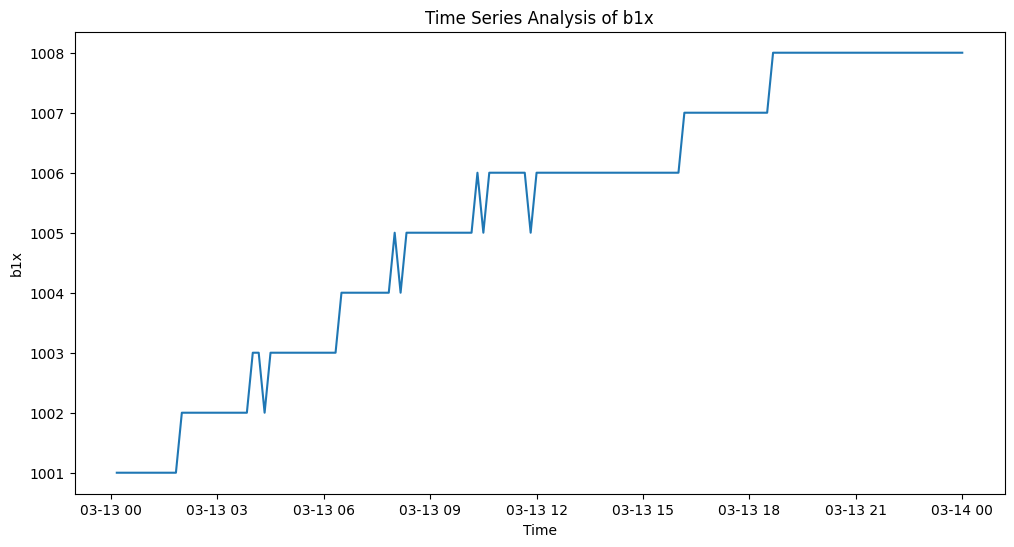

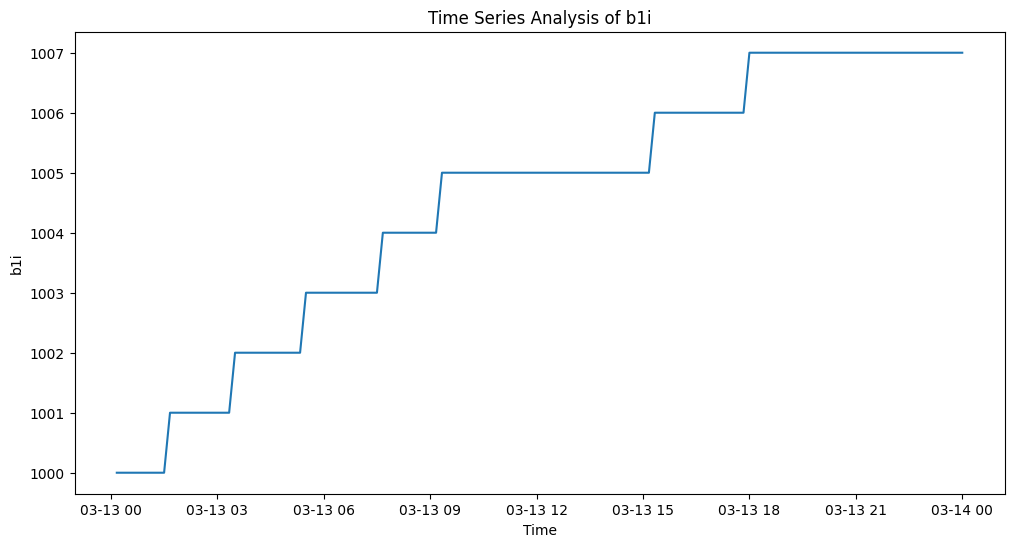

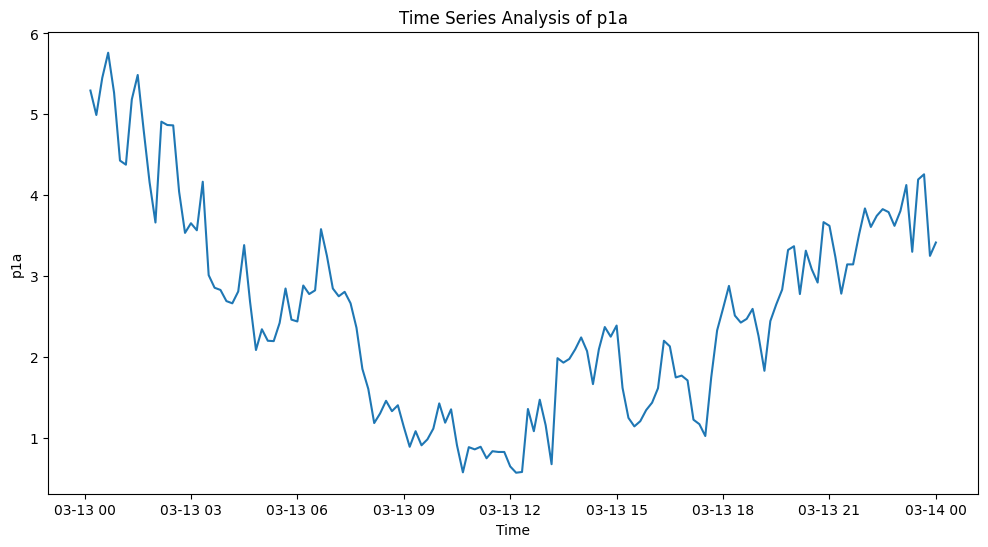

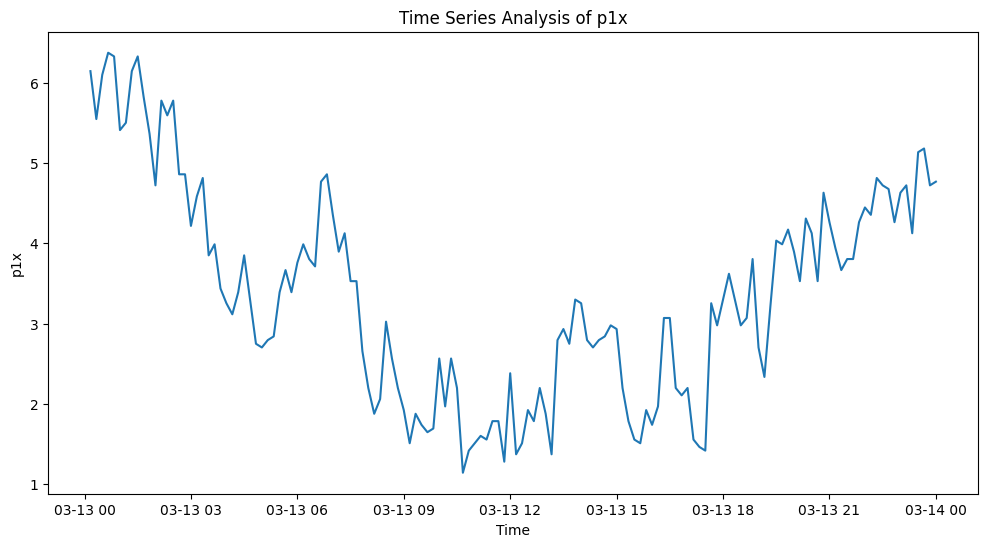

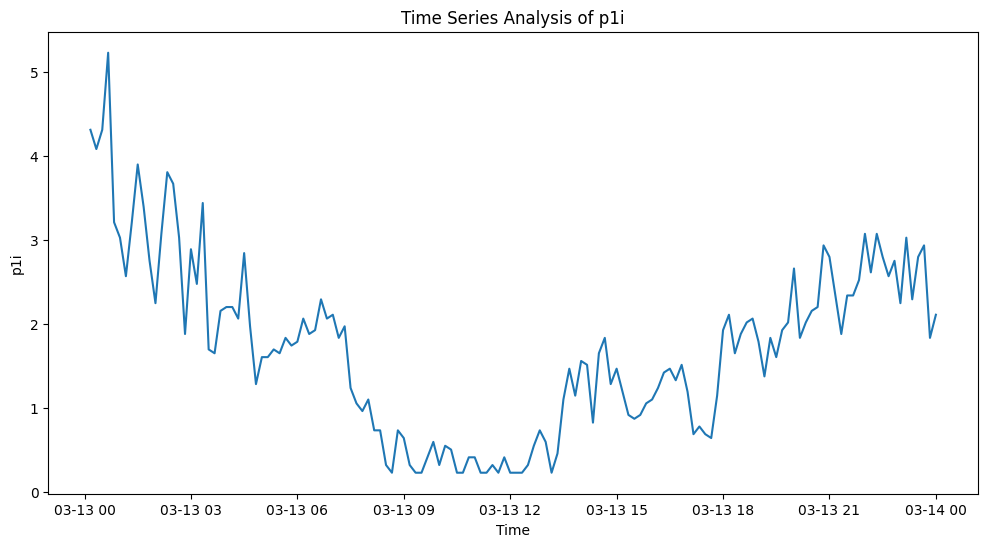

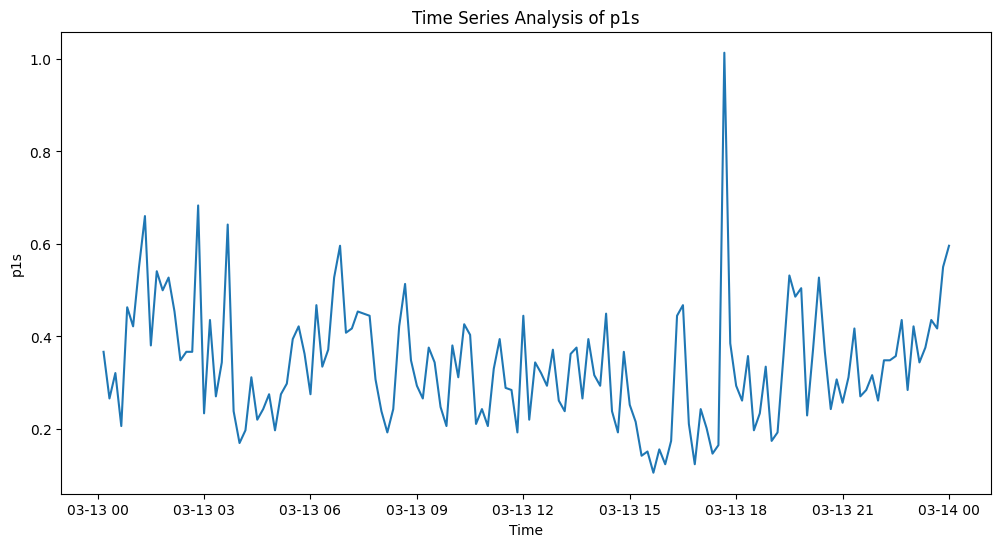

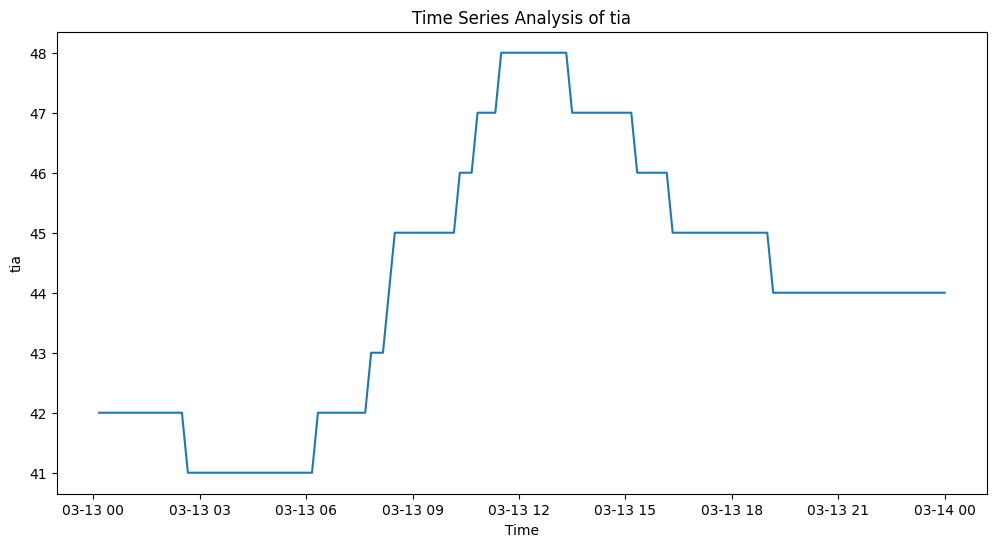

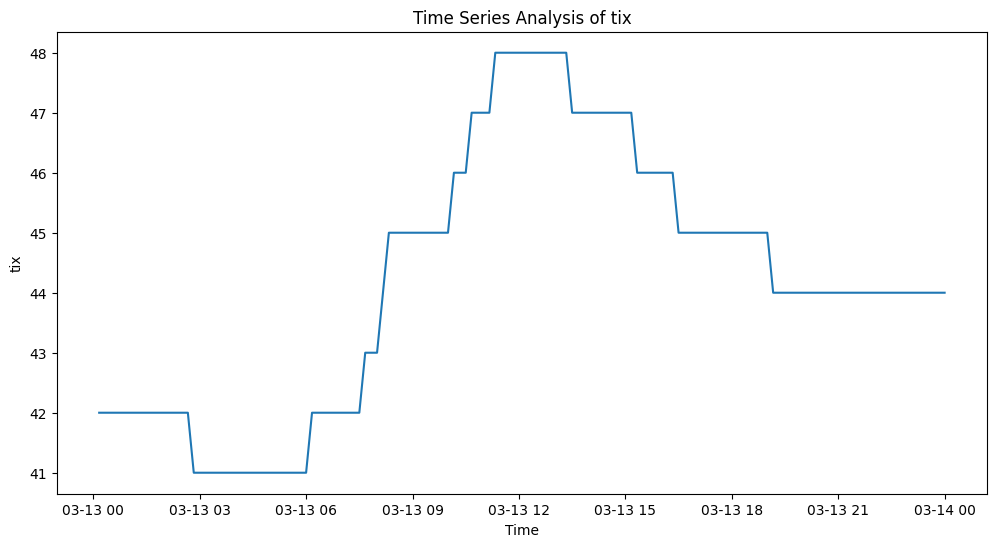

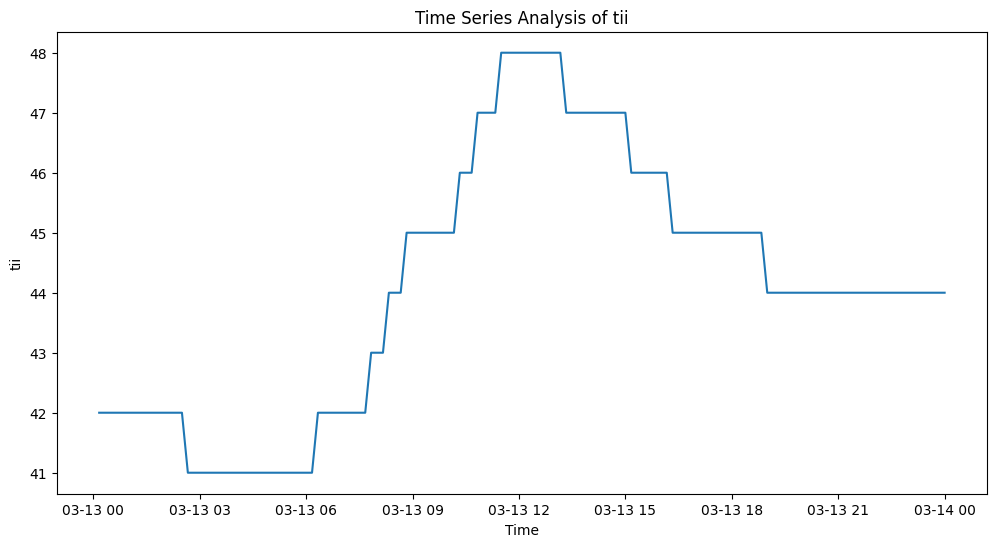

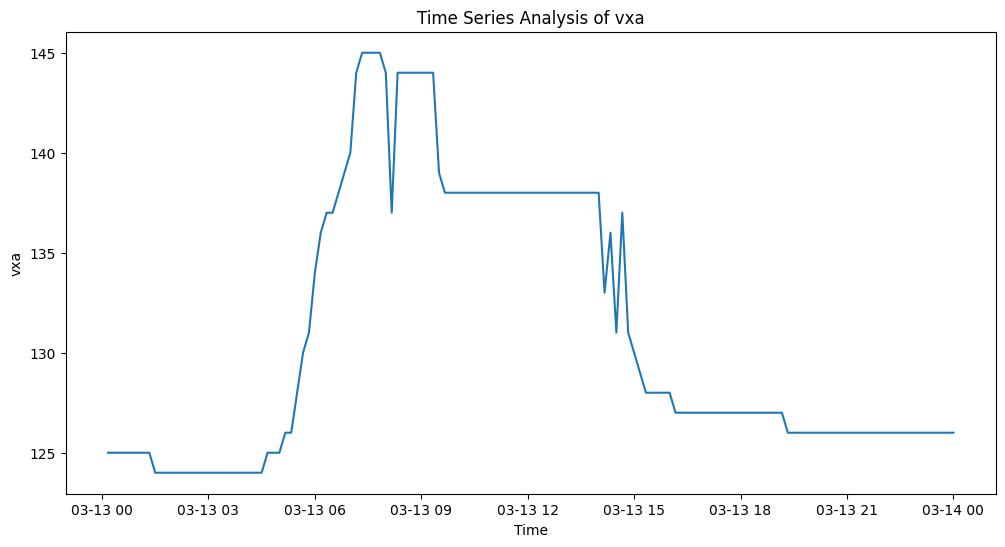

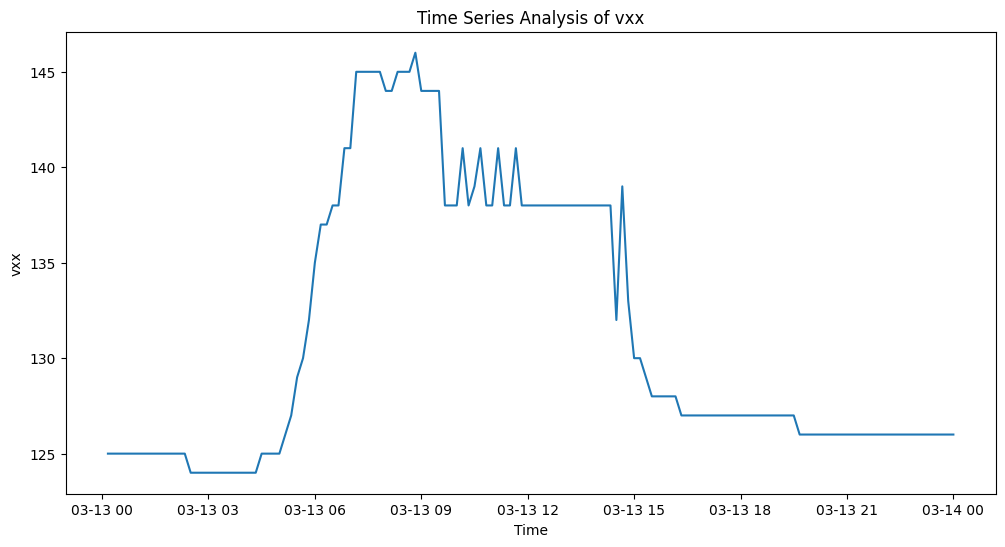

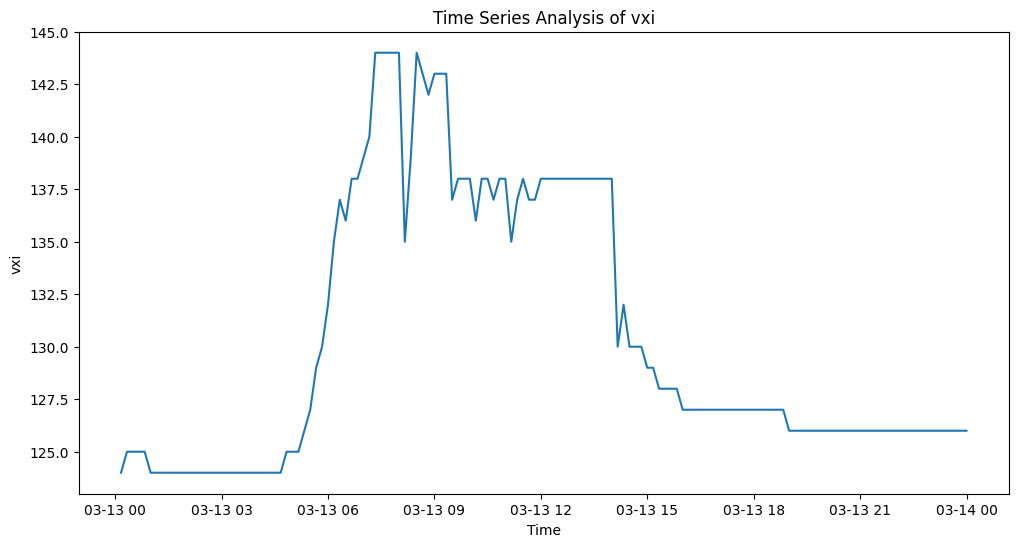

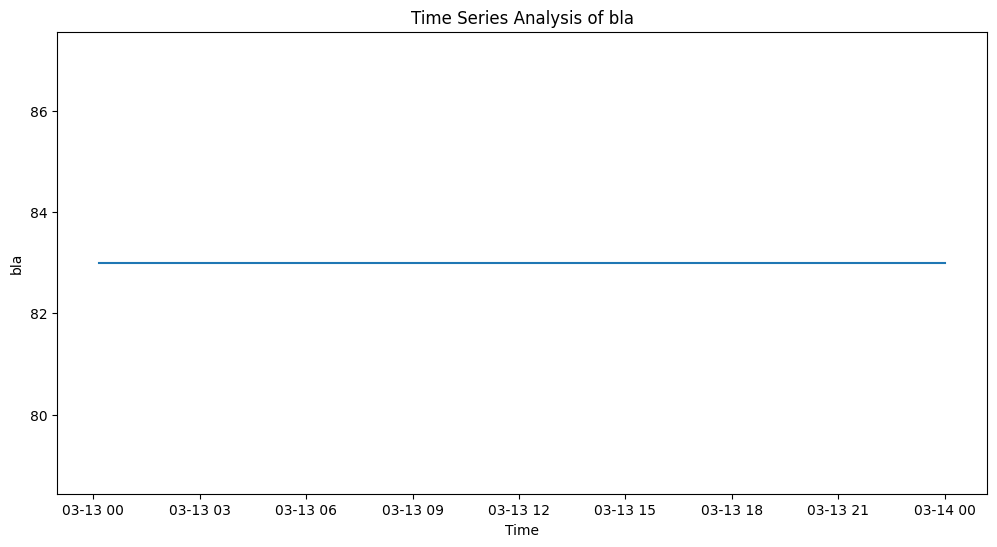

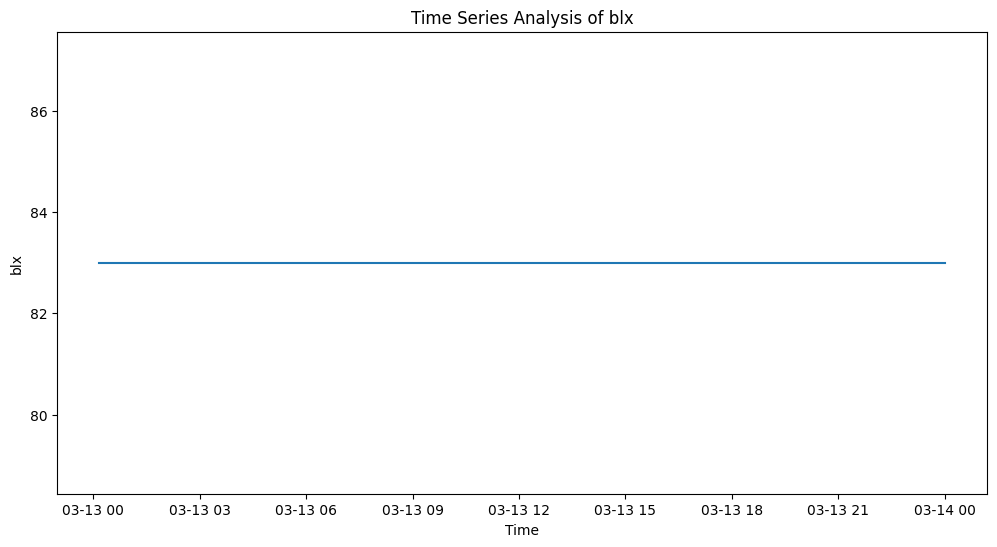

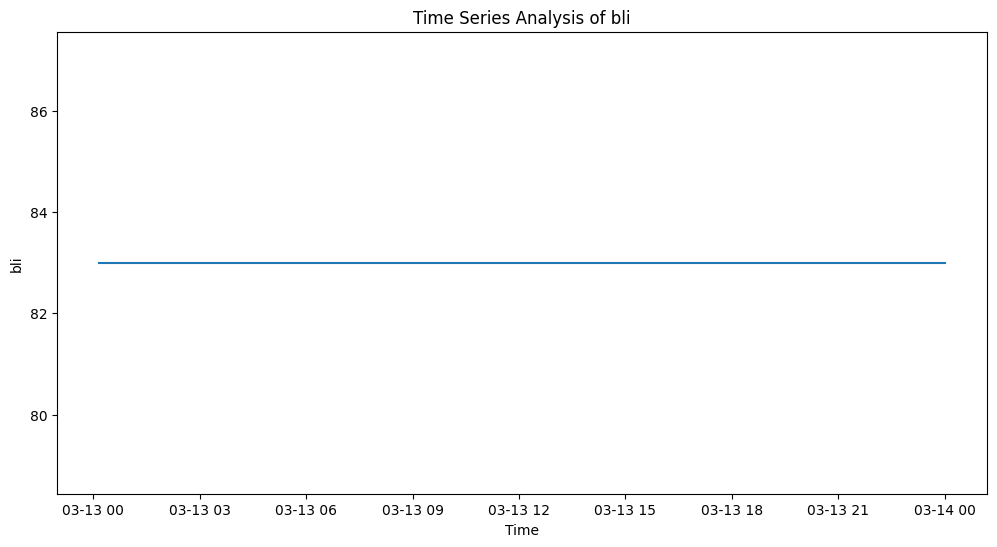

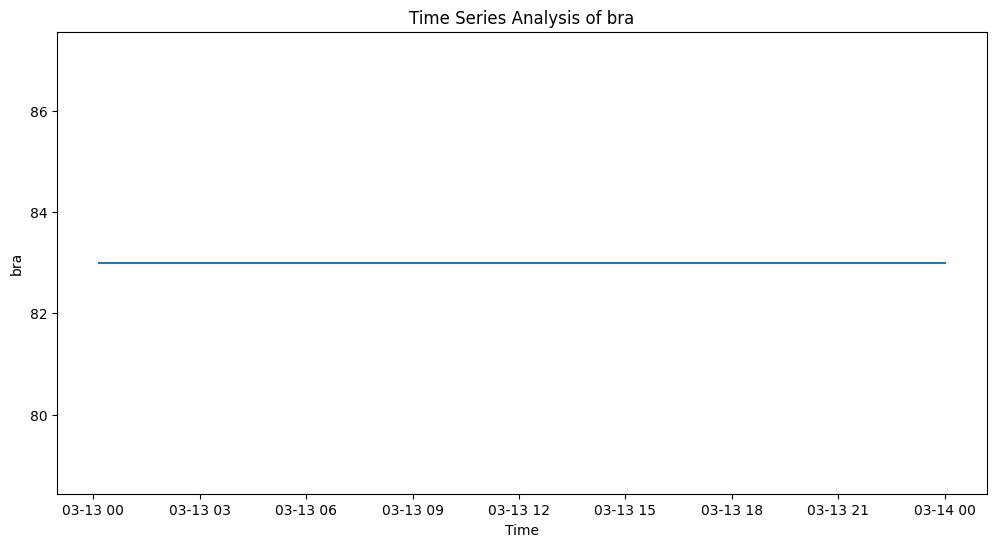

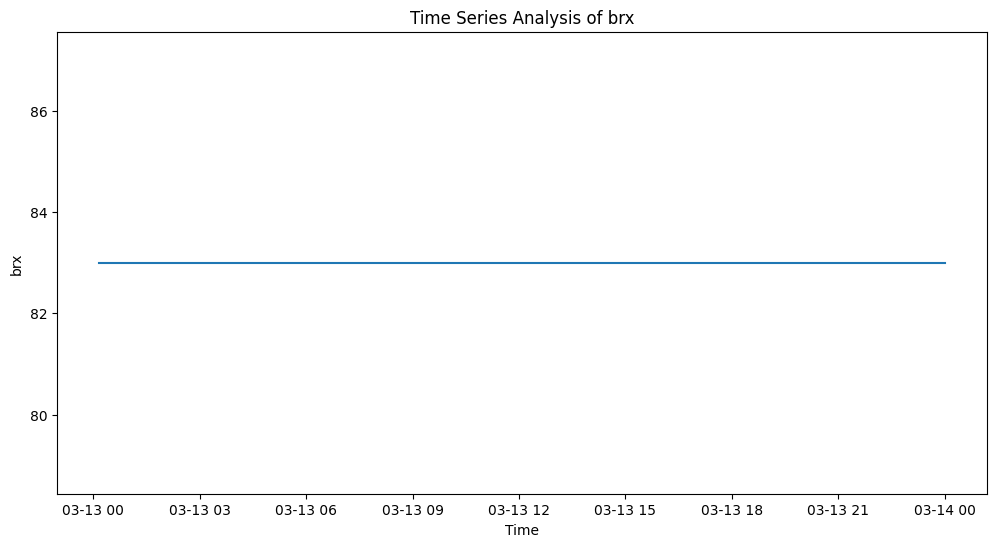

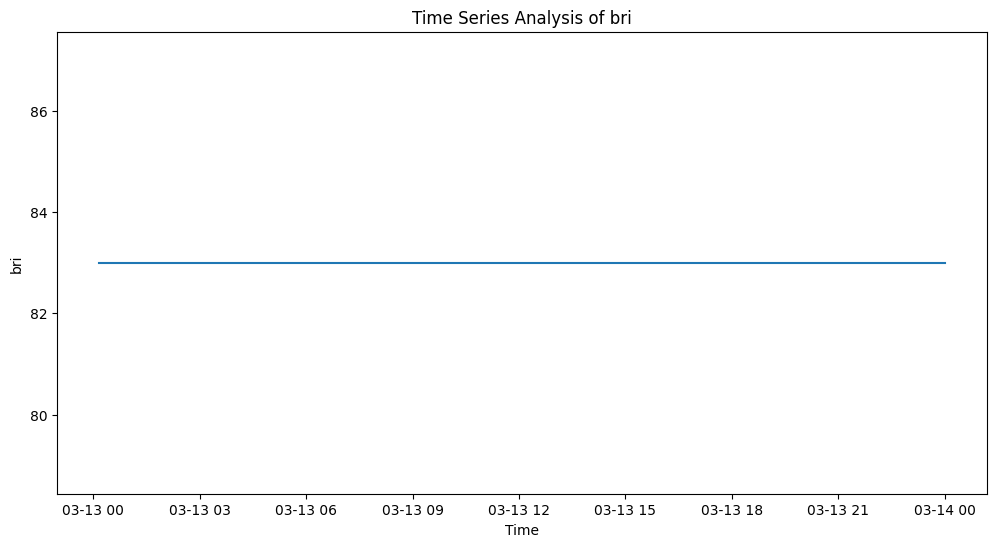

In [6]:
# Perform time series analysis for each column
for column in df.columns:
    if column not in ['date', 'time', 'period']:
        plt.figure(figsize=(12, 6))
        sns.lineplot(x=df.index, y=df[column])
        plt.title(f'Time Series Analysis of {column}')
        plt.xlabel('Time')
        plt.ylabel(column)
        plt.show()

In [7]:
# Exclude columns from correlation analysis
columns_to_exclude = ['datetime', 'date', 'time', 'period']
columns_for_correlation = [col for col in df.columns if col not in columns_to_exclude]

# Calculate correlation matrix
correlation_matrix = df[columns_for_correlation].corr()
#print(correlation_matrix)

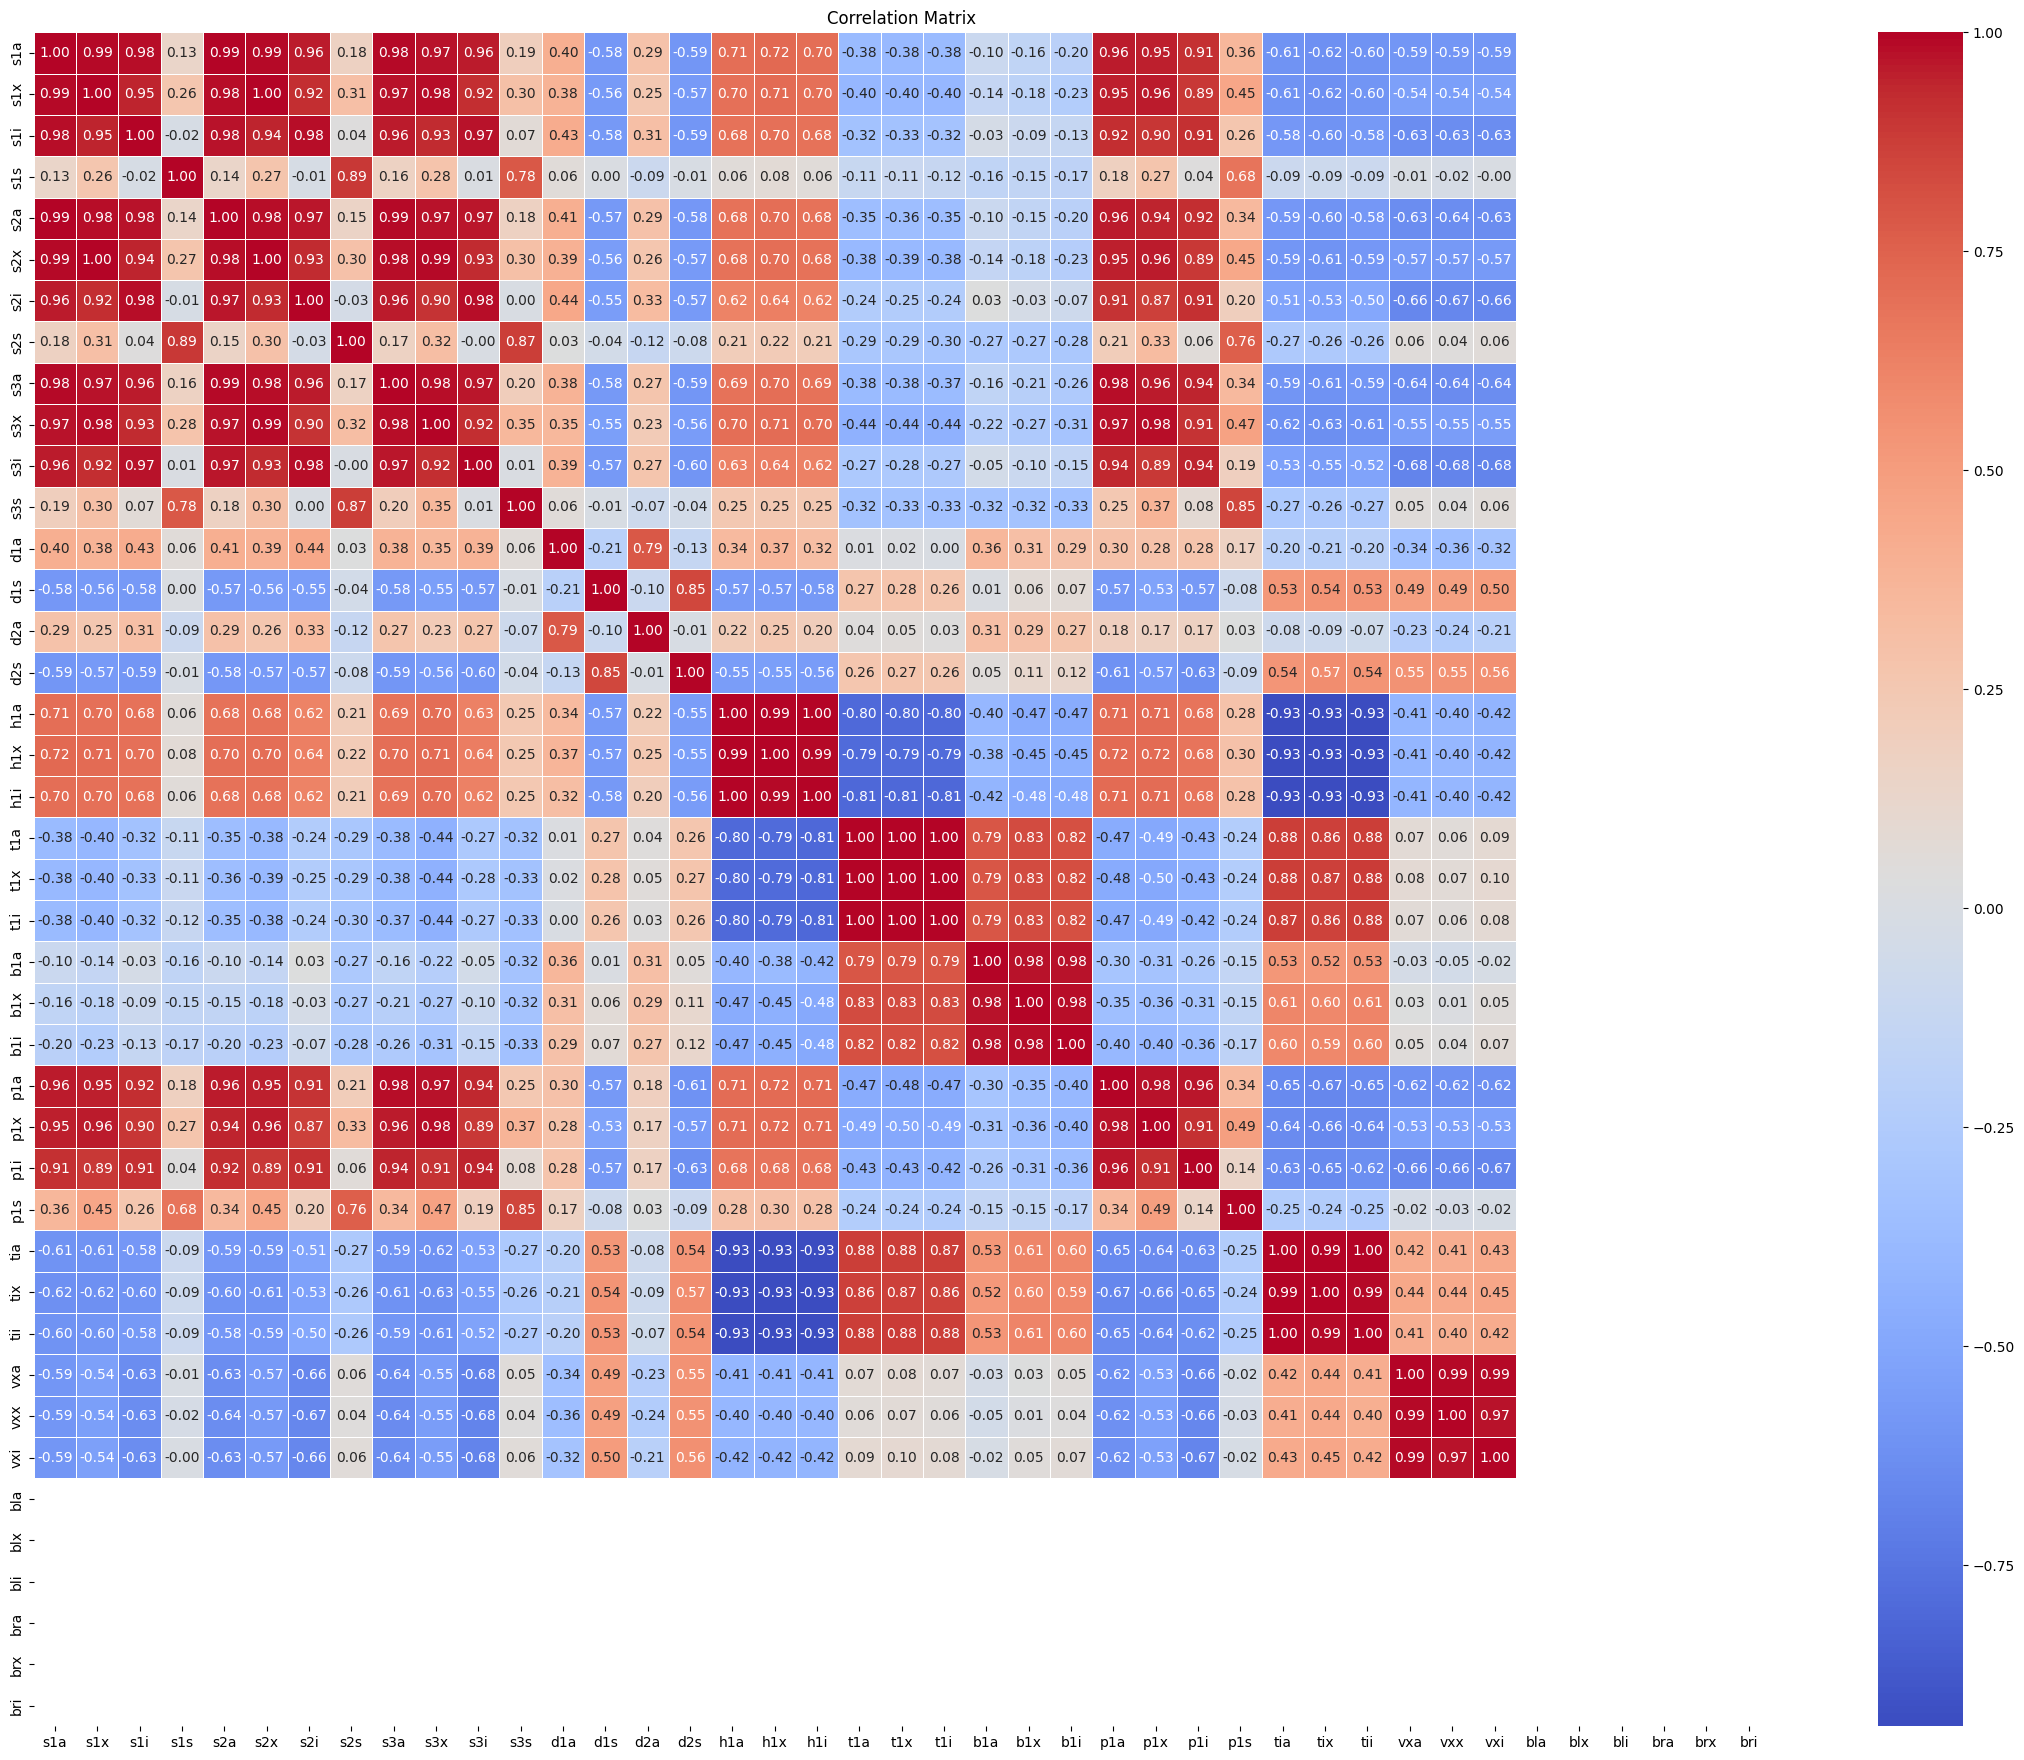

In [8]:
# Create a heatmap for the correlation matrix
#  The heatmap displays the correlation coefficients between different columns. 
# Positive values indicate a positive correlation, while negative values indicate a negative correlation. 
# Values closer to 1 or -1 indicate stronger correlations.
plt.figure(figsize=(28, 22))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

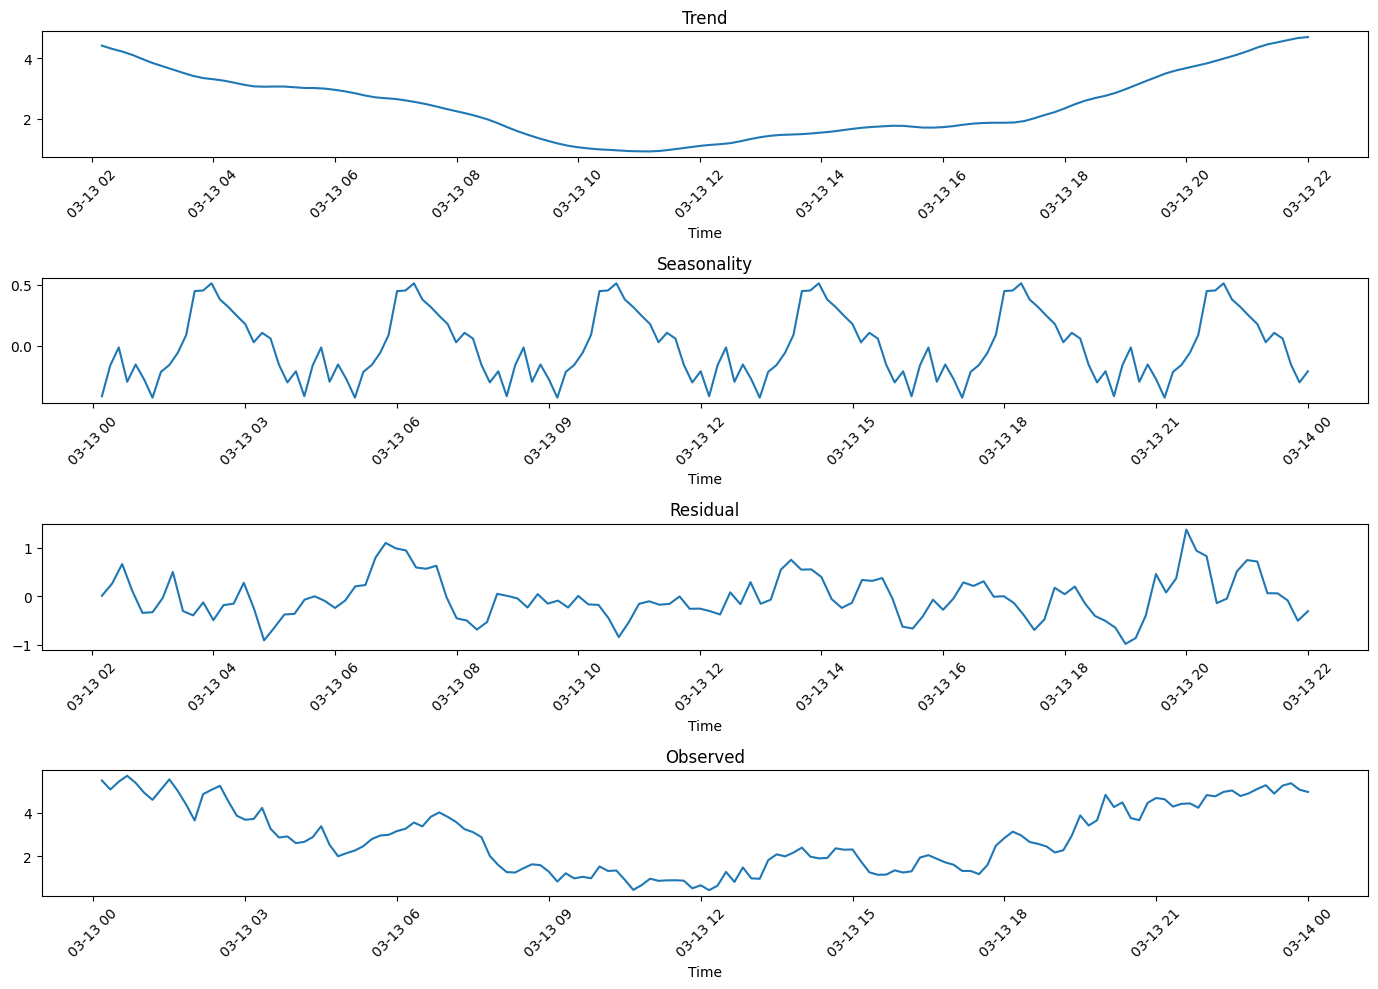

In [9]:
# Decompose the time series into trend, seasonality, and residual components
result = seasonal_decompose(df['s1a'], model='additive', period=24)  # Assuming seasonality is daily (24 hours)

# Increase figure size
plt.figure(figsize=(14, 10))

# Plot decomposed components
plt.subplot(4, 1, 1)
plt.plot(result.trend)
plt.title('Trend')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 2)
plt.plot(result.seasonal)
plt.title('Seasonality')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 3)
plt.plot(result.resid)
plt.title('Residual')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 4)
plt.plot(result.observed)
plt.title('Observed')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA para

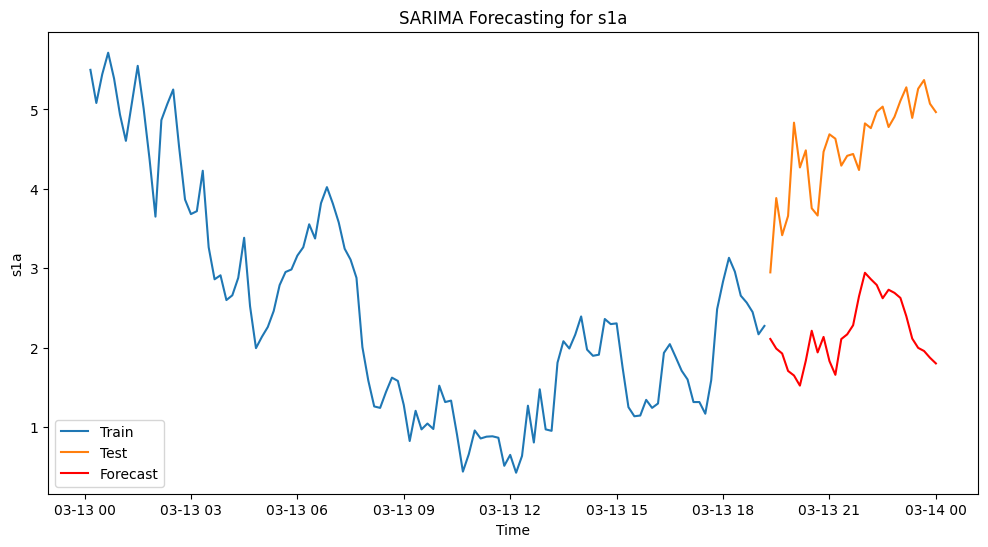

In [10]:
# Forecasting using SARIMA (Seasonal AutoRegressive Integrated Moving Average)
# Train-test split
train_size = int(len(df['s1a']) * 0.8)
train, test = df['s1a'][:train_size], df['s1a'][train_size:]

# Model fitting
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))  # Adjust order and seasonal_order as needed
fit_model = model.fit(disp=False)

# Forecast
forecast = fit_model.get_forecast(steps=len(test))
predicted_values = forecast.predicted_mean

# Visualize
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predicted_values, label='Forecast', color='red')
plt.title('SARIMA Forecasting for s1a')
plt.xlabel('Time')
plt.ylabel('s1a')
plt.legend()
plt.show()